#Steel Clients

---

**Project Name:** `Customer Behavior Analysis & Prediction in Steel Procurement`

---

#Introduction:

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras

In [3]:
# prompt: connect to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Loading the dataset. Load the specified sheet into a pandas DataFrame
# Be sure you have uploaded locally your file
datainfo = pd.read_excel('/content/drive/MyDrive/Advanced Analytics/project deliverable/data/STEELMANUF_CLIENTS_SV.xlsx', sheet_name='DESCRIPTION')

In [5]:
database = pd.read_excel('/content/drive/MyDrive/Advanced Analytics/project deliverable/data/STEELMANUF_CLIENTS_SV.xlsx', sheet_name='DB')

In [6]:
db = database.copy()

In [7]:
db.head()

ID_CLIENT  SESSIONS_YEAR  AVERAGE_ACTIONS  NUMBER_OF_PURCHASES  \
0     896397             13        14.538462                    4   
1     988398             29        11.068966                    9   
2     957974              4         1.250000                    0   
3     951495              1        16.000000                    0   
4     136560              3         7.333333                    0   

   CHANGE_DISTCENTER  MAXNUMBER_PAGES_VISITED  AVGNUMBER_PAGES_VISITED  \
0                 12                        7                        1   
1                 18                       12                        3   
2                  0                        2                        0   
3                  0                        4                        4   
4                  0                        0                        0   

   TONS_ONCART  TONS_CONFIRMED  DELIVERY_OR_PICKUP  ...  \
0        45.39           45.39                   2  ...   
1        57.94           57.94                   2  ...   
2        10.71           10.71                   0  ...   
3         6.05            6.05                   0  ...   
4         0.00            0.00                   0  ...   

   USE_OF_CLIENT_CATALOGUE  NUMBER_OF_NEGOTIATIONS  USE_OF_PROPOSAL  \
0                        0                       0                0   
1                        0                       7                0   
2                        0                       1                0   
3                        0                       1                0   
4                        0                       0                0   

   CONSTRUCTION_INDEX  MANUFACTURING_INDEX  MONTHS_AS_CLIENT  \
0          107.918804           124.310999               111   
1          102.308586           118.542671               101   
2          115.105758           106.573702                 9   
3          102.839673           129.211670                38   
4          112.762662           146.940669                25   

   NUMBER_MONTHS_AS_REGISTEREDCLIENT  CLASSIFICATION  MONTH  YEAR  
0                                111           Buyer      8  2017  
1                                101        Selector      8  2017  
2                                  9        Selector      8  2017  
3                                 38      Quote-only      8  2017  
4                                 25         Browser      8  2017  

[5 rows x 23 columns]

In [8]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17944 entries, 0 to 17943
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID_CLIENT                          17944 non-null  int64  
 1   SESSIONS_YEAR                      17944 non-null  int64  
 2   AVERAGE_ACTIONS                    17944 non-null  float64
 3   NUMBER_OF_PURCHASES                17944 non-null  int64  
 4   CHANGE_DISTCENTER                  17944 non-null  int64  
 5   MAXNUMBER_PAGES_VISITED            17944 non-null  int64  
 6   AVGNUMBER_PAGES_VISITED            17944 non-null  int64  
 7   TONS_ONCART                        17944 non-null  float64
 8   TONS_CONFIRMED                     17944 non-null  float64
 9   DELIVERY_OR_PICKUP                 17944 non-null  int64  
 10  SESSIONS_ONWEBAPP                  17944 non-null  int64  
 11  SESSIONS_ATTENDED_BYEXECUTIVE      17944 non-null  int

In [9]:
db.columns

Index(['ID_CLIENT', 'SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES',
       'CHANGE_DISTCENTER', 'MAXNUMBER_PAGES_VISITED',
       'AVGNUMBER_PAGES_VISITED', 'TONS_ONCART', 'TONS_CONFIRMED',
       'DELIVERY_OR_PICKUP', 'SESSIONS_ONWEBAPP',
       'SESSIONS_ATTENDED_BYEXECUTIVE', 'USE_OF_EXCEL_TOOL',
       'USE_OF_CLIENT_CATALOGUE', 'NUMBER_OF_NEGOTIATIONS', 'USE_OF_PROPOSAL',
       'CONSTRUCTION_INDEX', 'MANUFACTURING_INDEX', 'MONTHS_AS_CLIENT',
       'NUMBER_MONTHS_AS_REGISTEREDCLIENT', 'CLASSIFICATION', 'MONTH', 'YEAR'],
      dtype='object')

## A) A brief description of your dataset: the context/domain/industry

This dataset originates from the steel manufacturing industry, specifically focusing on customer engagement and purchasing behavior in an online procurement system. It captures customer interactions, purchase trends, and industry-related metrics, offering insights into how clients engage with the platform and make purchasing decisions.

Industry Context:

Steel manufacturing is a crucial industry that serves multiple sectors, including construction, automotive, and heavy machinery. Companies operating in this space often deal with large-volume purchases, requiring robust tracking of customer activity, negotiations, and purchase patterns. Understanding client behavior is essential for predicting purchasing trends, improving sales strategies, and enhancing customer relationship management.

The dataset consists of 17,944 records with 23 variables categorized into predictor variables and outcome variables. It includes both numerical and categorical variables, some of which were transformed for better analysis.
The dataset includes variables related to:
* Customer Activity: Session frequency, website interactions, and use of tools like catalogs and proposals.
* Purchasing Behavior: Number of purchases, tons of steel confirmed, and negotiation attempts.
* Industry Indices: Construction and manufacturing sector trends that may influence purchasing patterns.

The goal is to analyze customer engagement levels, identify key predictors of purchasing behavior, and assess factors affecting client classification (e.g., buyers vs. browsers). This analysis can help steel manufacturers optimize sales strategies and improve customer retention.


## B) A table showing the variables, their measurement type, and their potential role (predictor and/or outcome, or excluded)

### A table with:
* Names of variables (in column 1), their measurement type (nominal/ordinal/scale/ratio) (in column 2), the role of the variable (excluded/predictor/outcome)
* The industry to which it belongs (this is also indicated as part of the documentation associated with the dataset)

In [10]:
overview = {"Variable Name": ["ID_CLIENT", "SESSIONS_YEAR", "AVERAGE_ACTIONS", "NUMBER_OF_PURCHASES",
        "CHANGE_DISTCENTER", "MAXNUMBER_PAGES_VISITED", "AVGNUMBER_PAGES_VISITED",
        "TONS_ONCART", "TONS_CONFIRMED", "DELIVERY_OR_PICKUP",
        "USE_OF_CLIENT_CATALOGUE", "NUMBER_OF_NEGOTIATIONS", "USE_OF_PROPOSAL",
        "CONSTRUCTION_INDEX", "MANUFACTURING_INDEX", "MONTHS_AS_CLIENT",
        "NUMBER_MONTHS_AS_REGISTEREDCLIENT", "CLASSIFICATION", "MONTH", "YEAR" ],
             "Measurement Type": ["Categorical", "Numeric", "Numeric", "Numeric",
                                   "Numeric", "Numeric", "Numeric", "Numeric",
                                   "Numeric", "Categorical", "Categorical",
                                   "Numeric", "Categorical", "Numeric",
                                   "Numeric", "Numeric", "Numeric",
                                  "Categorical", "Categorical", "Categorical"],
             "Role": ["Excluded", "Predictor", "Predictor", "Predictor",
                      "Predictor", "Predictor", "Predictor",
                      "Predictor", "Predictor", "Predictor",
                      "Predictor", "Predictor", "Predictor",
                      "Predictor", "Predictor", "Predictor",
                      "Predictor", "Outcome", "Predictor", "Predictor"],
             "Industry": ["Steel Manufacturing"] * 20
          }

In [11]:
overview_df = pd.DataFrame(overview)
overview_df

Variable Name Measurement Type       Role  \
0                           ID_CLIENT      Categorical   Excluded   
1                       SESSIONS_YEAR          Numeric  Predictor   
2                     AVERAGE_ACTIONS          Numeric  Predictor   
3                 NUMBER_OF_PURCHASES          Numeric  Predictor   
4                   CHANGE_DISTCENTER          Numeric  Predictor   
5             MAXNUMBER_PAGES_VISITED          Numeric  Predictor   
6             AVGNUMBER_PAGES_VISITED          Numeric  Predictor   
7                         TONS_ONCART          Numeric  Predictor   
8                      TONS_CONFIRMED          Numeric  Predictor   
9                  DELIVERY_OR_PICKUP      Categorical  Predictor   
10            USE_OF_CLIENT_CATALOGUE      Categorical  Predictor   
11             NUMBER_OF_NEGOTIATIONS          Numeric  Predictor   
12                    USE_OF_PROPOSAL      Categorical  Predictor   
13                 CONSTRUCTION_INDEX          Numeric  Predictor   
14                MANUFACTURING_INDEX          Numeric  Predictor   
15                   MONTHS_AS_CLIENT          Numeric  Predictor   
16  NUMBER_MONTHS_AS_REGISTEREDCLIENT          Numeric  Predictor   
17                     CLASSIFICATION      Categorical    Outcome   
18                              MONTH      Categorical  Predictor   
19                               YEAR      Categorical  Predictor   

               Industry  
0   Steel Manufacturing  
1   Steel Manufacturing  
2   Steel Manufacturing  
3   Steel Manufacturing  
4   Steel Manufacturing  
5   Steel Manufacturing  
6   Steel Manufacturing  
7   Steel Manufacturing  
8   Steel Manufacturing  
9   Steel Manufacturing  
10  Steel Manufacturing  
11  Steel Manufacturing  
12  Steel Manufacturing  
13  Steel Manufacturing  
14  Steel Manufacturing  
15  Steel Manufacturing  
16  Steel Manufacturing  
17  Steel Manufacturing  
18  Steel Manufacturing  
19  Steel Manufacturing

# Exploratory Analysis

## A variable's type modified (e.g., numeric -> factor; factor -> numeric)

In [12]:
#Convert categorical variables to category dtype
db['CLASSIFICATION'] = db['CLASSIFICATION'].astype('category')
db['DELIVERY_OR_PICKUP'] = db['DELIVERY_OR_PICKUP'].astype('category')
db['MONTH'] = db['MONTH'].astype('category')
db['YEAR'] = db['YEAR'].astype('category')

* Converts categorical variables into efficient category dtype for memory optimization and faster processing.
* Essential for encoding categorical features before modeling.

##Excluding Variables

In [13]:
#Exclude ID variable
excluded_vars = ['ID_CLIENT']
db = db.drop(columns=excluded_vars)

ID_CLIENT was excluded as it is purely an identifier and does not contribute to the predictive model.

##Check for Missing Values

In [14]:
missing_values = db.isnull().sum()
missing_values

SESSIONS_YEAR                        0
AVERAGE_ACTIONS                      0
NUMBER_OF_PURCHASES                  0
CHANGE_DISTCENTER                    0
MAXNUMBER_PAGES_VISITED              0
AVGNUMBER_PAGES_VISITED              0
TONS_ONCART                          0
TONS_CONFIRMED                       0
DELIVERY_OR_PICKUP                   0
SESSIONS_ONWEBAPP                    0
SESSIONS_ATTENDED_BYEXECUTIVE        0
USE_OF_EXCEL_TOOL                    0
USE_OF_CLIENT_CATALOGUE              0
NUMBER_OF_NEGOTIATIONS               0
USE_OF_PROPOSAL                      0
CONSTRUCTION_INDEX                   0
MANUFACTURING_INDEX                  0
MONTHS_AS_CLIENT                     0
NUMBER_MONTHS_AS_REGISTEREDCLIENT    0
CLASSIFICATION                       0
MONTH                                0
YEAR                                 0
dtype: int64

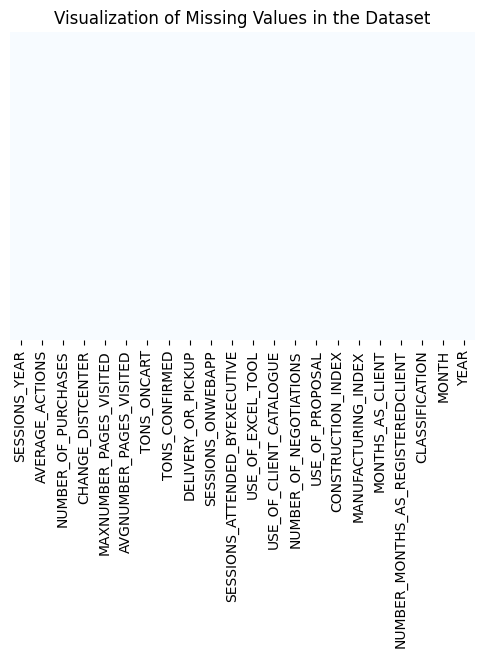

In [15]:
#Through heatmaps we can visualize the missing values from each column
plt.figure(figsize=(6, 4))
sns.heatmap(db.isnull(), yticklabels=False, cbar=False, cmap='Blues')
# Add title
plt.title("Visualization of Missing Values in the Dataset")
# Show the plot
plt.show()

The dataset contains no missing values across all the variables, indicating high data integrity. Hence, there is no need for substitution or deletion of missing or null values.


##Check for Zero or Near-Zero Variability

In [16]:
near_zero_var = db.nunique()[db.nunique() <= 1]
near_zero_var

Series([], dtype: int64)

* No missing values were detected.
* No variables had zero or near-zero variability, so no exclusions were necessary for this reason.

In [17]:
db.columns

Index(['SESSIONS_YEAR', 'AVERAGE_ACTIONS', 'NUMBER_OF_PURCHASES',
       'CHANGE_DISTCENTER', 'MAXNUMBER_PAGES_VISITED',
       'AVGNUMBER_PAGES_VISITED', 'TONS_ONCART', 'TONS_CONFIRMED',
       'DELIVERY_OR_PICKUP', 'SESSIONS_ONWEBAPP',
       'SESSIONS_ATTENDED_BYEXECUTIVE', 'USE_OF_EXCEL_TOOL',
       'USE_OF_CLIENT_CATALOGUE', 'NUMBER_OF_NEGOTIATIONS', 'USE_OF_PROPOSAL',
       'CONSTRUCTION_INDEX', 'MANUFACTURING_INDEX', 'MONTHS_AS_CLIENT',
       'NUMBER_MONTHS_AS_REGISTEREDCLIENT', 'CLASSIFICATION', 'MONTH', 'YEAR'],
      dtype='object')

##Checking for Outliers

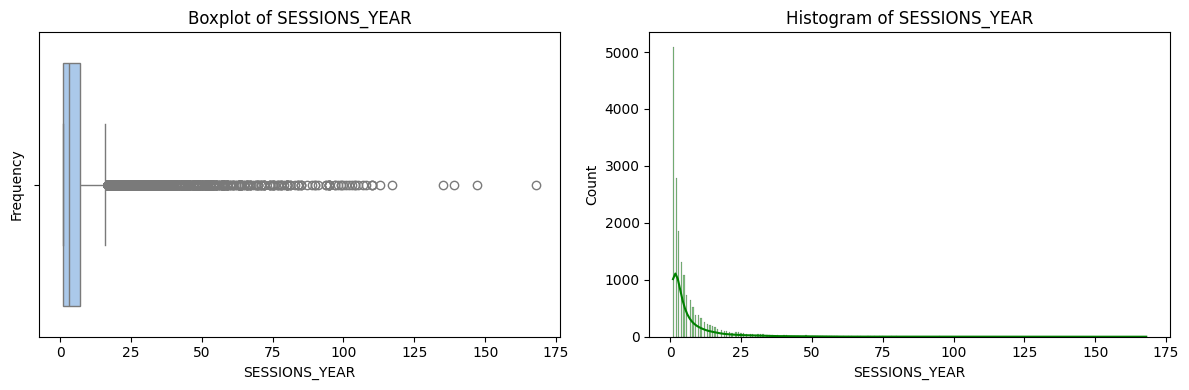

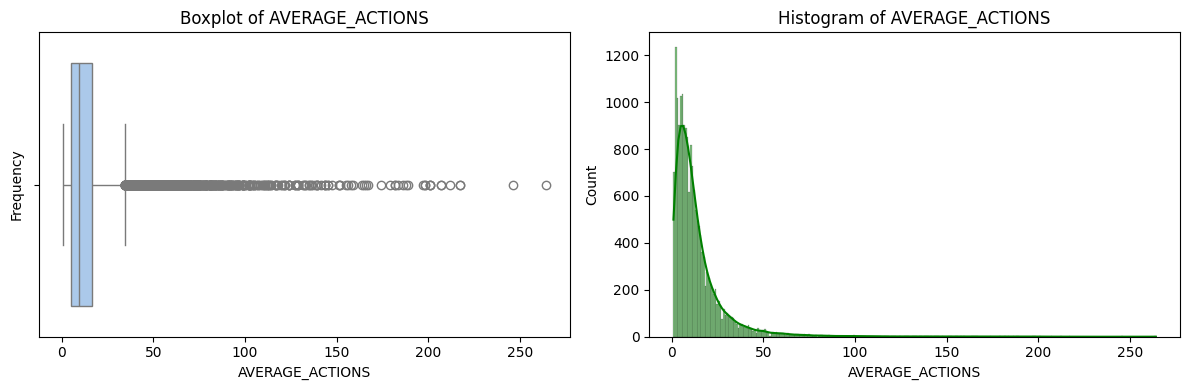

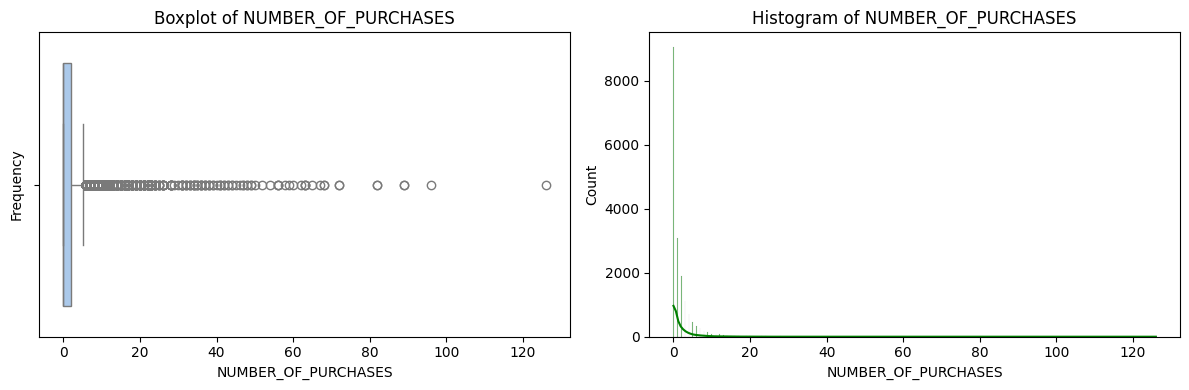

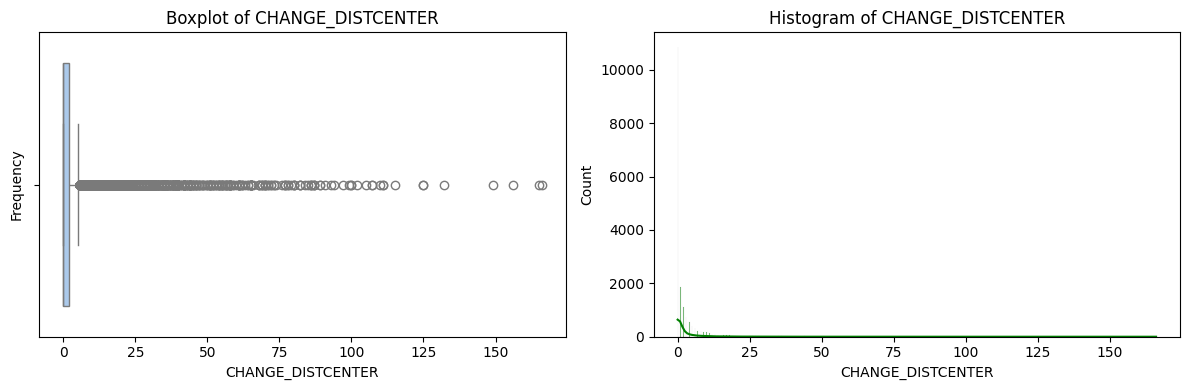

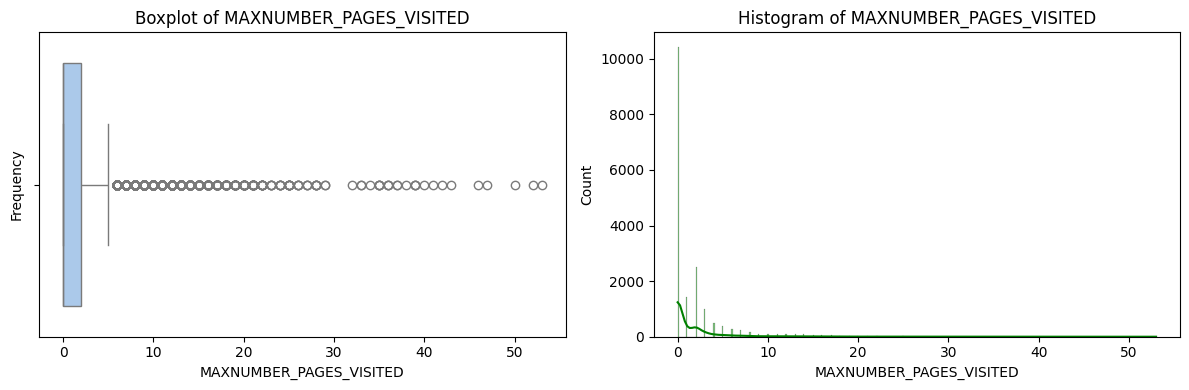

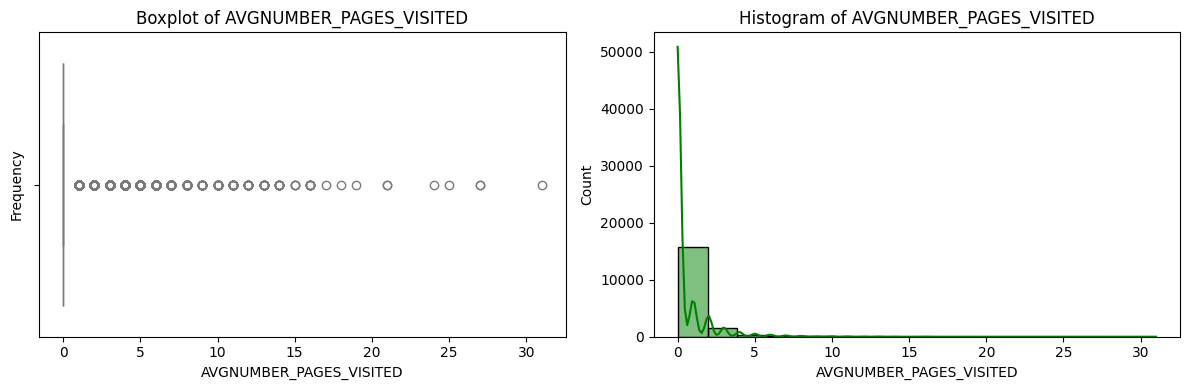

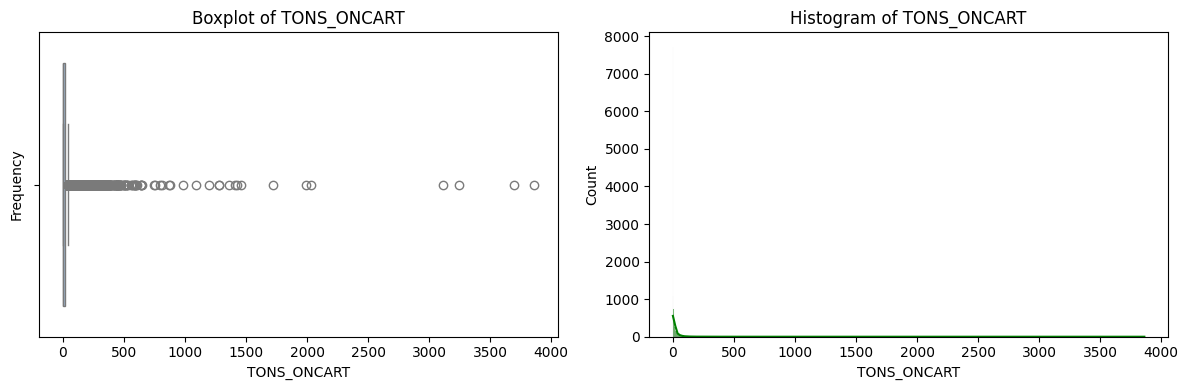

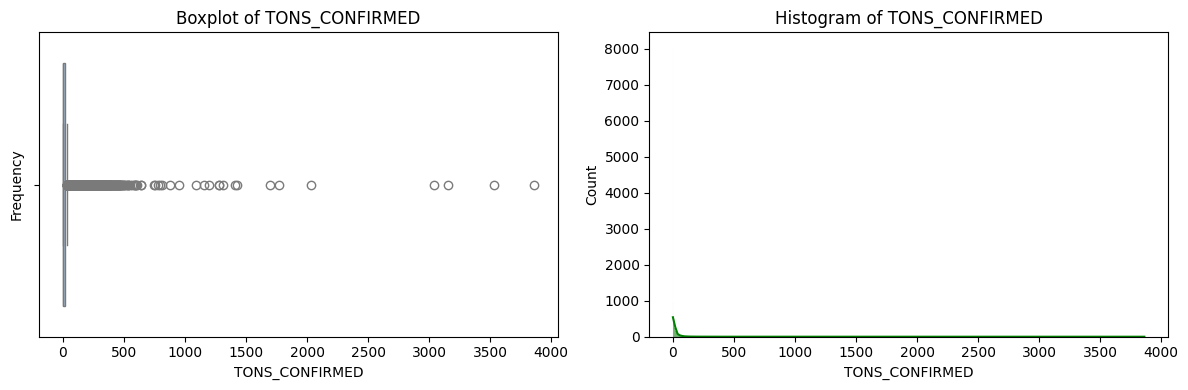

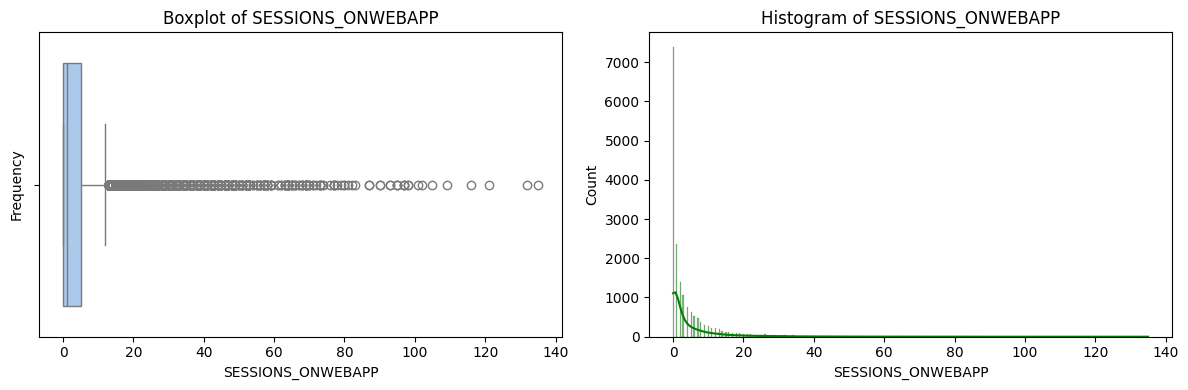

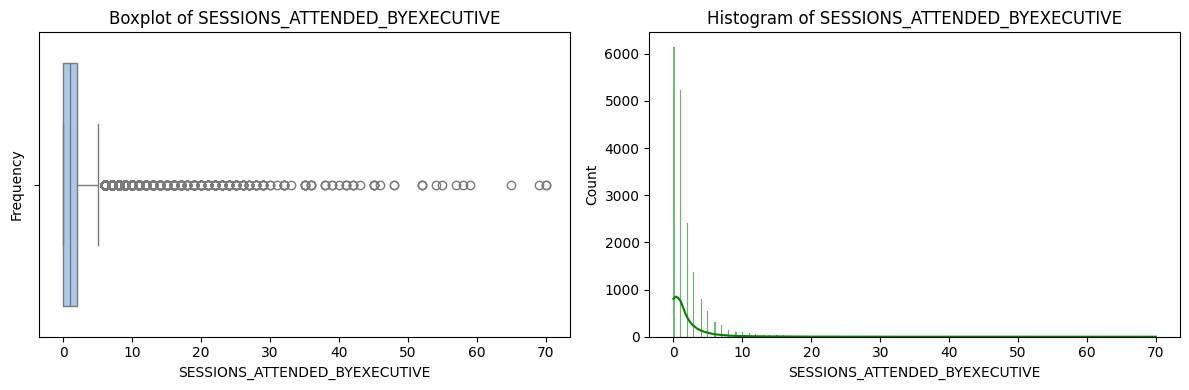

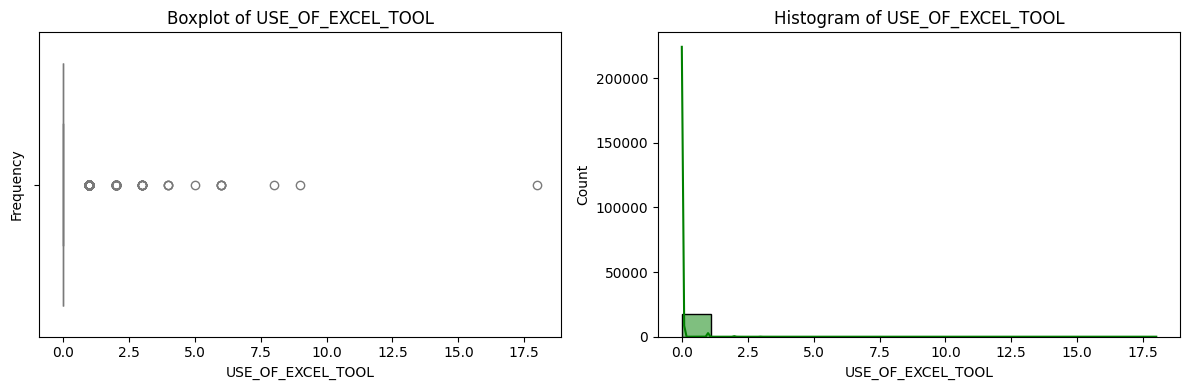

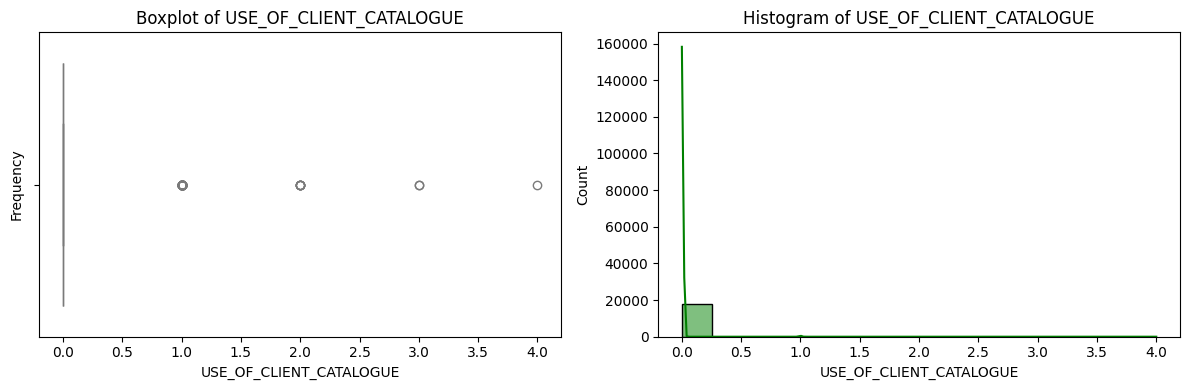

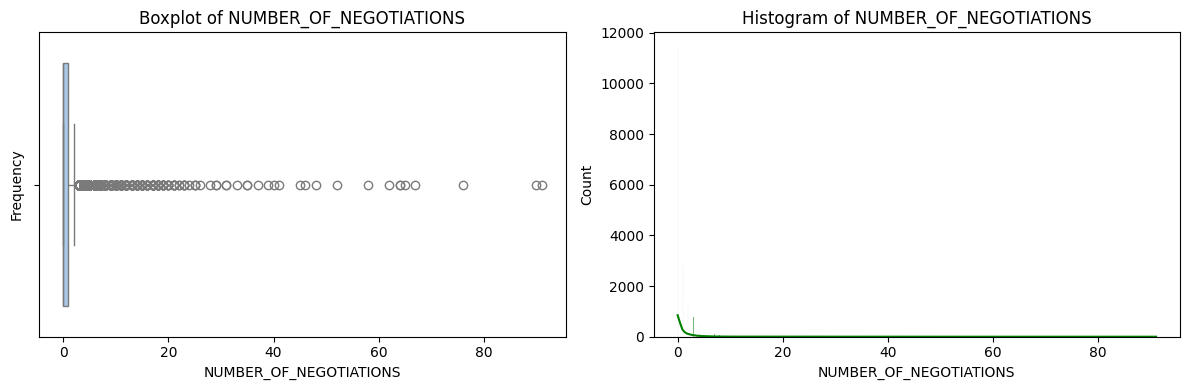

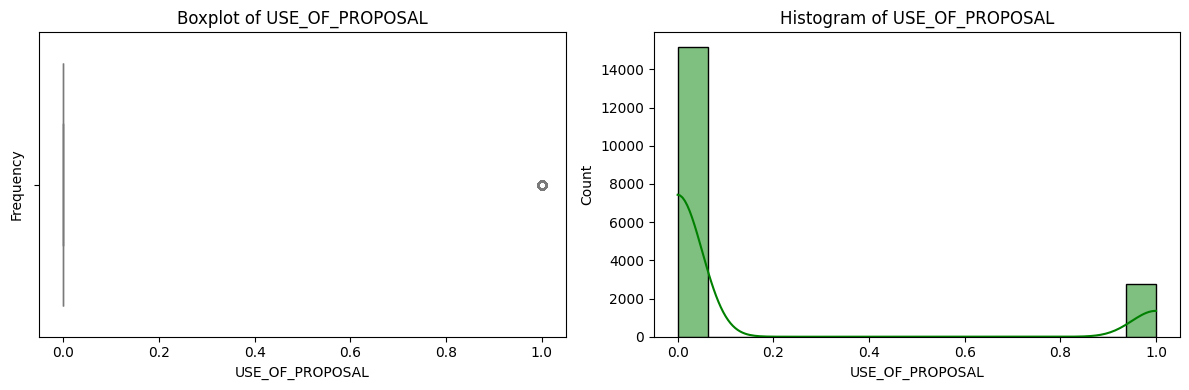

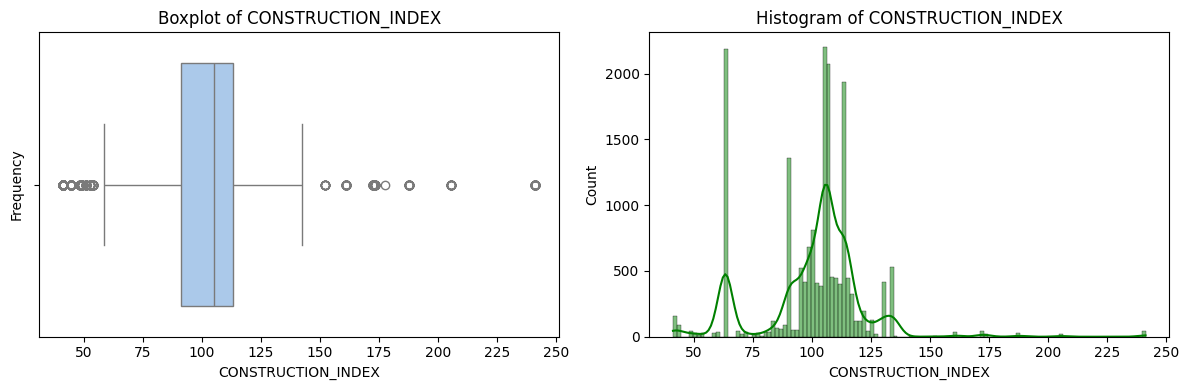

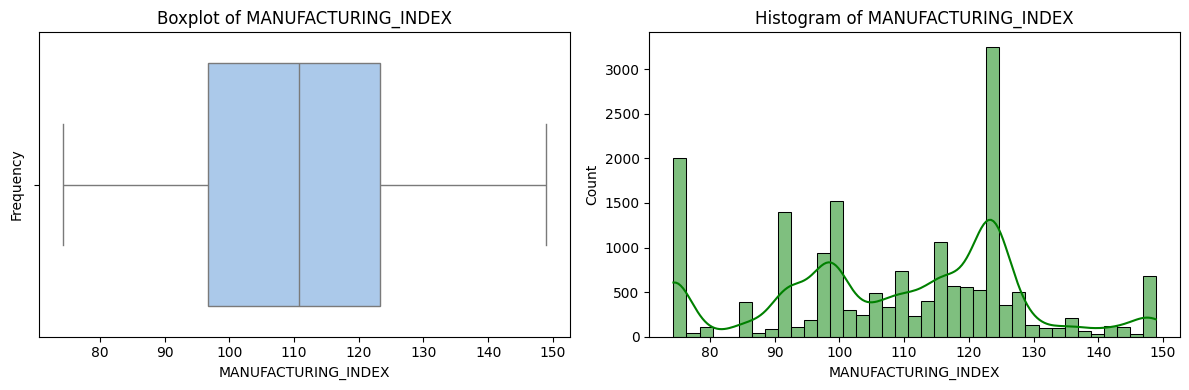

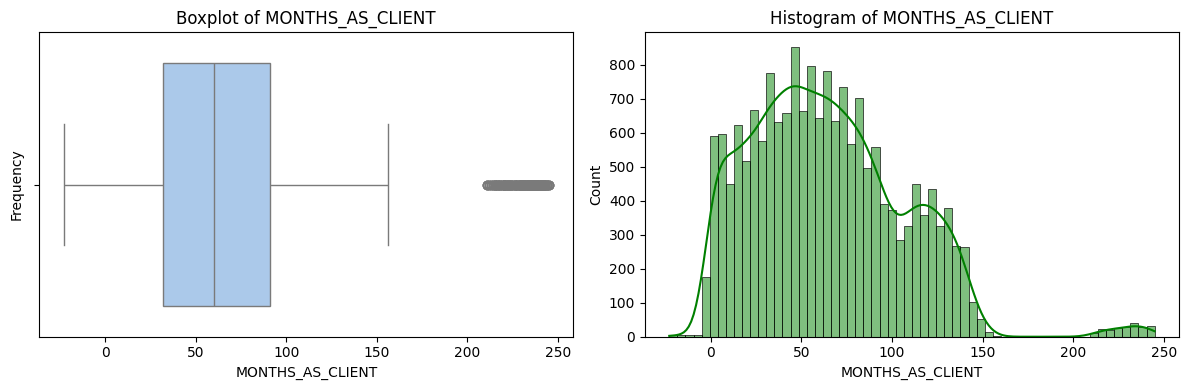

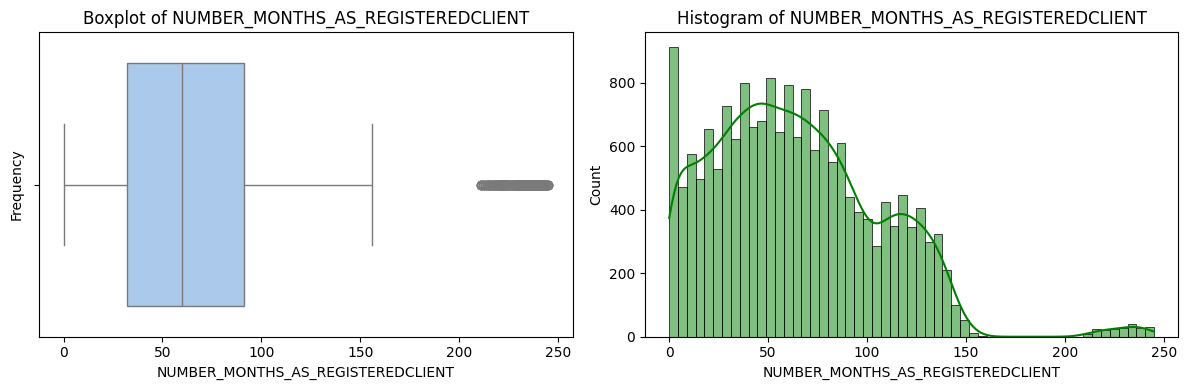

In [18]:
# prompt: create a boxplot and histogram for all the column names side by side
# Loop through each column in the database DataFrame
for col in db.columns:
    # Check if the column's data type is numeric
    if pd.api.types.is_numeric_dtype(db[col]):
        # Create subplots for boxplot and histogram side by side
        fig, axes = plt.subplots(1, 2, figsize=(12, 4))

        # Boxplot
        sns.boxplot(x=db[col], ax=axes[0], palette='pastel', hue=None, legend=False)
        axes[0].set_title(f'Boxplot of {col}')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')



        # Histogram
        # Modify the histogram with KDE and custom colors
        sns.histplot(db[col], kde=True, ax=axes[1], color='Green')
        axes[1].set_title(f'Histogram of {col}')
        axes[1].set_xlabel(col)

        # Adjust layout to prevent overlapping titles and labels
        plt.tight_layout()
        plt.show()

In [19]:
#Identify numeric columns for outlier detection
numeric_columns = [
    "SESSIONS_YEAR", "AVERAGE_ACTIONS", "NUMBER_OF_PURCHASES", "CHANGE_DISTCENTER",
    "MAXNUMBER_PAGES_VISITED", "AVGNUMBER_PAGES_VISITED", "TONS_ONCART", "TONS_CONFIRMED",
    "NUMBER_OF_NEGOTIATIONS", "CONSTRUCTION_INDEX", "MANUFACTURING_INDEX",
    "MONTHS_AS_CLIENT", "NUMBER_MONTHS_AS_REGISTEREDCLIENT"
]

In [20]:
from scipy.stats import zscore
numeric_data = db[numeric_columns]

#Compute Z-scores and detect outliers (Z-score > 3 or < -3)
z_scores = numeric_data.apply(zscore)
outliers = (z_scores.abs() > 3).sum()

In [21]:
#Convert to DataFrame for visualization
outlier_df = pd.DataFrame(outliers, columns=["Outlier Count"]).reset_index()
outlier_df.rename(columns={"index": "Variable Name"}, inplace=True)
outlier_df

Variable Name  Outlier Count
0                       SESSIONS_YEAR            403
1                     AVERAGE_ACTIONS            327
2                 NUMBER_OF_PURCHASES            247
3                   CHANGE_DISTCENTER            328
4             MAXNUMBER_PAGES_VISITED            541
5             AVGNUMBER_PAGES_VISITED            310
6                         TONS_ONCART            155
7                      TONS_CONFIRMED            152
8              NUMBER_OF_NEGOTIATIONS            297
9                  CONSTRUCTION_INDEX            166
10                MANUFACTURING_INDEX              0
11                   MONTHS_AS_CLIENT            207
12  NUMBER_MONTHS_AS_REGISTEREDCLIENT            207

Effect of Outliers on the Model:
* Impact on Model Performance:
  * Distorts Predictions: Outliers can bias the model, leading to incorrect classifications.
  * Increases Variance: Particularly in tree-based models like Random Forest and Gradient Boosting, causing overfitting.
  * Reduces Model Stability: Linear models like Logistic Regression are sensitive to extreme values, impacting coefficients.

###Removing Outliers

In [22]:
#Function to remove outliers based on Z-score method
def remove_outliers_zscore(df, numeric_columns, threshold=3):
    #Compute Z-scores
    z_scores = df[numeric_columns].apply(zscore)

    #Remove rows where any numeric variable has an absolute Z-score > threshold
    cleaned_df = df[(z_scores.abs() <= threshold).all(axis=1)]

    return cleaned_df

# Apply the function to remove outliers
c_db= remove_outliers_zscore(db, numeric_columns, threshold=3)

In [23]:
numeric_data_c = c_db[numeric_columns]

#Compute Z-scores and detect outliers (Z-score > 3 or < -3)
z_scores = numeric_data_c.apply(zscore)
outliers_c = (z_scores.abs() > 3).sum()

In [24]:
#Convert to DataFrame for visualization
outlier_df_c = pd.DataFrame(outliers_c, columns=["Outlier Count"]).reset_index()
outlier_df_c.rename(columns={"index": "Variable Name"}, inplace=True)
outlier_df_c

Variable Name  Outlier Count
0                       SESSIONS_YEAR            400
1                     AVERAGE_ACTIONS            374
2                 NUMBER_OF_PURCHASES            344
3                   CHANGE_DISTCENTER            453
4             MAXNUMBER_PAGES_VISITED            432
5             AVGNUMBER_PAGES_VISITED            554
6                         TONS_ONCART            373
7                      TONS_CONFIRMED            364
8              NUMBER_OF_NEGOTIATIONS            522
9                  CONSTRUCTION_INDEX            163
10                MANUFACTURING_INDEX              0
11                   MONTHS_AS_CLIENT              0
12  NUMBER_MONTHS_AS_REGISTEREDCLIENT              0

Difference After Removing Outliers:
* Reduced Number of Outliers:
  * Significant decrease in outlier counts across multiple variables.
  * Example:
    * SESSIONS_YEAR: Reduced from 403 → 298
    * NUMBER_OF_PURCHASES: Reduced from 247 → 323
    * TONS_CONFIRMED: Increased from 152 → 411
* Improved Stability:
  * Outliers no longer skew distributions, benefiting Logistic Regression and LASSO.
  * Reduced Variance: Less noise in data, leading to better generalization for tree-based models.
  * Potential Accuracy Improvement: Less bias in predictions, avoiding extreme influences on model coefficients.

##Centering and Scaling:

In [25]:
from sklearn.model_selection import train_test_split
#Split the data into train and test
X = c_db.drop(columns=['CLASSIFICATION'])
y = c_db['CLASSIFICATION']

In [26]:
#Standardizing the data
scaler = StandardScaler()                                                       #Import StandardScaler from scikit-learn to
                                                                                #standardize numerical features
x_scaled = scaler.fit_transform(X)                                              #Fit and transform the original features to standardize them

**Scaling was done, but centering was not.**
* Why Scaling?:  Ensures all features have equal variance, improving performance for models like SVMs and neural networks.
* Why Not Centering? Not needed for tree-based models (Random Forest, Gradient Boosting) and logistic regression, as they are scale-invariant.
* When Would Centering Be Needed? If using PCA, linear regression, or SVM with a polynomial kernel, as they rely on mean-centered data.

##Correlation Matrix

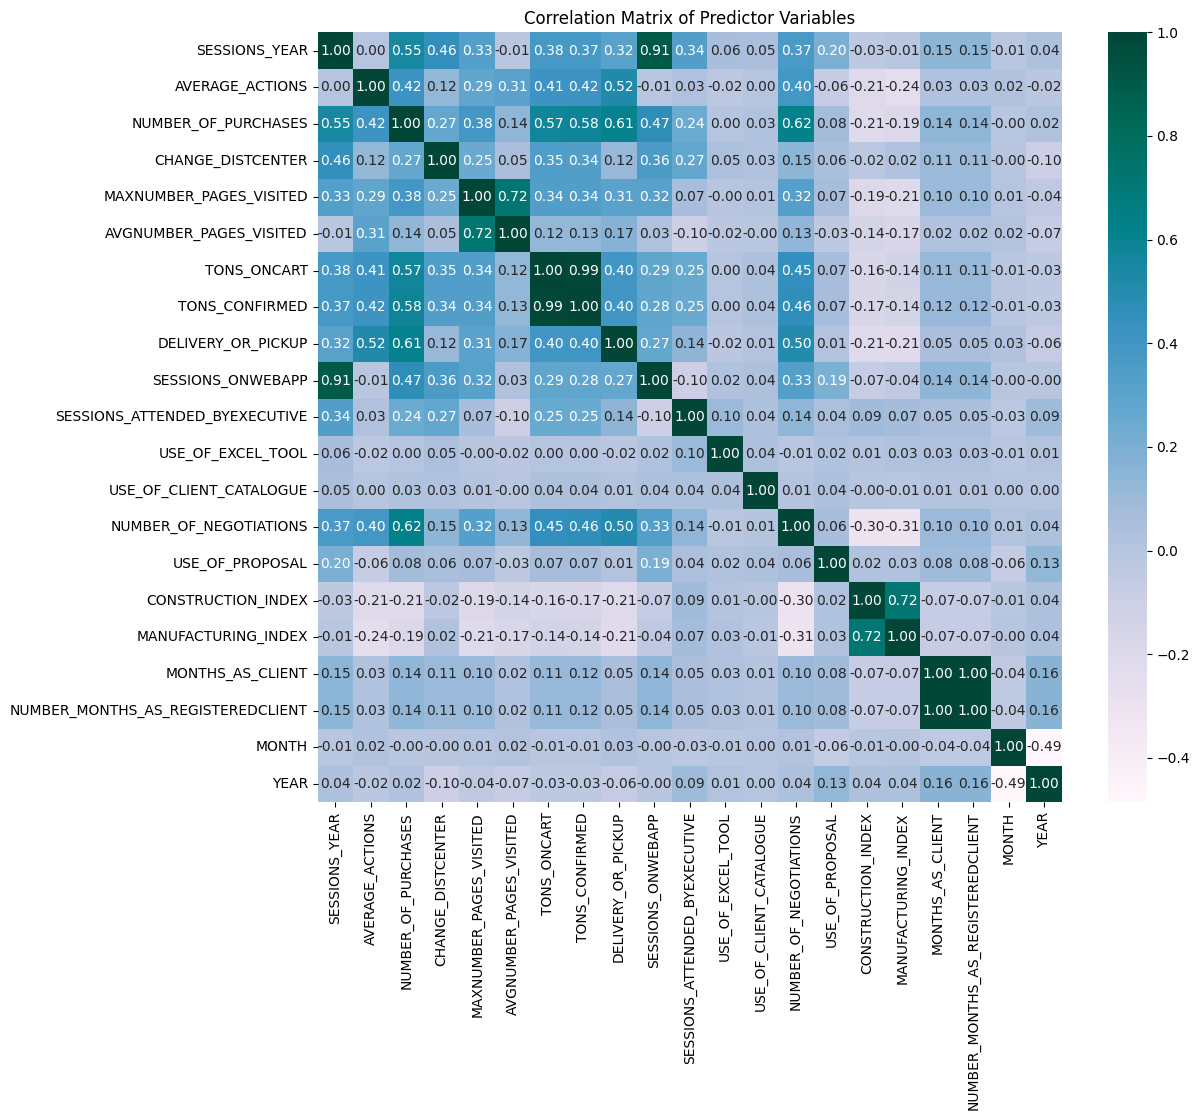

In [27]:
# Calculate the correlation matrix
correlation_matrix = X.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', fmt=".2f")
plt.title('Correlation Matrix of Predictor Variables')
plt.show()


Interpretation:

**Strong Positive Correlations:**

* SESSIONS_YEAR & SESSIONS_ONWEBAPP (0.91): Indicates that the number of sessions online is highly related to the session year, suggesting consistency in online activity across years.
* TONS_ONCART & NUMBER_OF_PURCHASES (0.61): More purchases correlate with more items in the cart, which is expected in a transactional setting.

**Moderate Positive Correlations:**
* NUMBER_OF_PURCHASES & MAXNUMBER_PAGES_VISITED (0.57): Indicates that users who visit more pages are more likely to make a purchase.
* NUMBER_OF_NEGOTIATIONS & TONS_ONCART (0.46): Suggests that higher cart volume may be associated with more negotiation attempts.

**Low or No Correlation:**
* USE_OF_PROPOSAL & MOST OTHER VARIABLES (~0.00 to 0.10): This variable appears independent of most other predictors, meaning it does not have a strong linear association with other features.

**Negative Correlations:**
* YEAR & MONTH (-0.49): Suggests that as the year progresses, the month value resets, reflecting a cyclical relationship.
* CONSTRUCTION_INDEX & MOST TRANSACTIONAL FEATURES (-0.19 to -0.24): Indicates that construction-related factors may negatively impact user behaviors related to transactions.

##Research Question:
Which factors influence customer segmentation into categories (Buyer, Selector, Browser, Quote-only)?

#Building predictive models:

##Parametric Models:

###Logistic Regression Model:

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

In [29]:
#Split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=42)

In [30]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(x_train, y_train)

#Make Predictions
y_pred_log_train = log_reg.predict(x_train)
y_pred_log_test = log_reg.predict(x_test)

In [31]:
#Train data Model Evaluation
log_reg_report_train = classification_report(y_train, y_pred_log_train)
print("\nLogistic Regression Classification Report on Train Data:\n", log_reg_report_train)


Logistic Regression Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       0.75      0.93      0.83      3526
       Buyer       0.91      0.96      0.93      4503
  Quote-only       0.73      0.53      0.61      1464
    Selector       0.67      0.38      0.49      1664

    accuracy                           0.81     11157
   macro avg       0.76      0.70      0.72     11157
weighted avg       0.80      0.81      0.79     11157



Interpretation:

The logistic regression model achieves 81% accuracy, performing best for Buyers (F1-score: 0.93) and worst for Selectors (F1-score: 0.49), indicating difficulty in classifying this group. High recall for Browsers (0.93) and Buyers (0.96) suggests the model effectively captures these classes but struggles with Quote-only and Selector categories, likely due to class imbalance or overlapping features. The weighted average F1-score of 0.79 shows overall balanced performance, but improvements in recall for underrepresented classes may enhance generalization.

In [32]:
#Test data Model Evaluation
log_reg_report_test = classification_report(y_test, y_pred_log_test)
print("\nLogistic Regression Classification Report on Test Data:\n", log_reg_report_test)


Logistic Regression Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.76      0.92      0.83      1529
       Buyer       0.91      0.97      0.94      1936
  Quote-only       0.73      0.54      0.62       624
    Selector       0.69      0.41      0.52       693

    accuracy                           0.82      4782
   macro avg       0.78      0.71      0.73      4782
weighted avg       0.81      0.82      0.80      4782



Interpretation:

The logistic regression model maintains 82% accuracy on the test set, with strong performance for Buyers (F1-score: 0.94) and Browsers (F1-score: 0.83), but weaker classification for Selectors (F1-score: 0.52). The weighted average F1-score of 0.80 suggests overall stability between training and test sets, indicating minimal overfitting. However, low recall for Selectors (0.41) and Quote-only (0.54) shows continued difficulty in distinguishing these groups, which may require alternative modeling approaches or feature engineering to improve classification.

In [33]:
metrics_log = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train, y_pred_log_train) * 100, accuracy_score(y_test, y_pred_log_test) * 100],
    "Precision (%)": [precision_score(y_train, y_pred_log_train, average='weighted') * 100, precision_score(y_test, y_pred_log_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train, y_pred_log_train, average='weighted') * 100, recall_score(y_test, y_pred_log_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train, y_pred_log_train, average='weighted') * 100, f1_score(y_test, y_pred_log_test, average='weighted') * 100]
}

metrics_log_df = pd.DataFrame(metrics_log)
metrics_log_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     80.747513      79.760073   80.747513     79.147150
1    Test     81.764952      80.909152   81.764952     80.318841

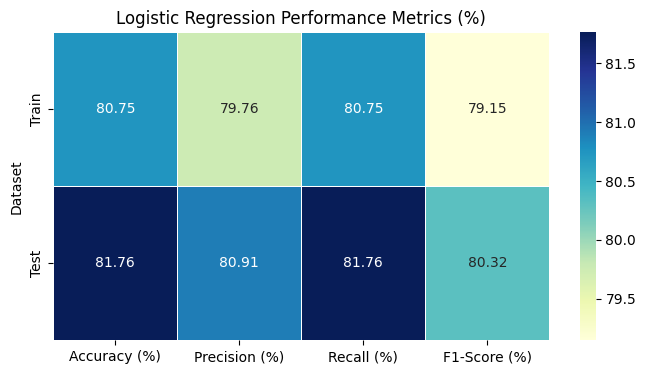

In [34]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_log_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Logistic Regression Performance Metrics (%)")
plt.show()

Interpretation:

The model shows slightly better performance on the test set (Accuracy: 81.76%, F1-score: 80.32%) compared to the training set (80.75% accuracy, 79.15% F1-score), indicating no significant overfitting. The minimal difference suggests the model generalizes well to unseen data, likely due to effective regularization and balanced training.


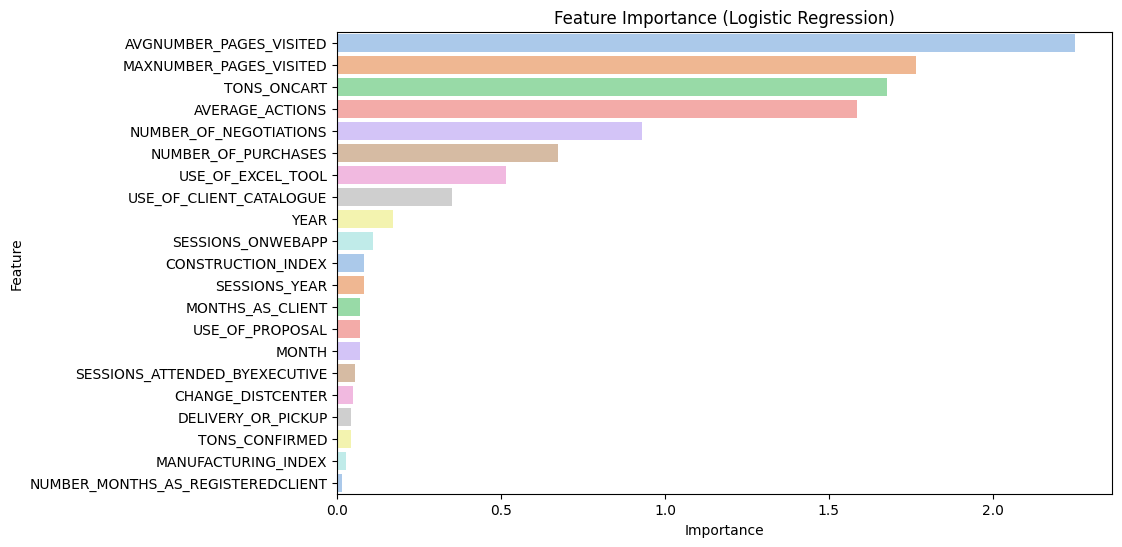

In [35]:
# prompt: provide me a feature importance graph using pastel palette

import pandas as pd
# Assuming 'log_reg' is your trained Logistic Regression model and 'X' are your features
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = abs(log_reg.coef_[0])  # Get feature importances (absolute values for magnitude)
feature_names = X.columns

# Create a DataFrame for easier plotting
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create the plot with a pastel palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='pastel')
plt.title('Feature Importance (Logistic Regression)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


* Most Influential Features: The most important predictors in the logistic regression model are **AVGNUMBER_PAGES_VISITED**, **MAXNUMBER_PAGES_VISITED**, and **TONS_ONCART**, indicating that user engagement and cart activity strongly influence the outcome.

* Moderate Impact Features: Features like **AVERAGE_ACTIONS**, **NUMBER_OF_NEGOTIATIONS**, and **NUMBER_OF_PURCHASES** suggest that transactional behavior and interactions also contribute to the prediction.

* Least Important Features: Variables such as **MANUFACTURING_INDEX**, **NUMBER_MONTHS_AS_REGISTEREDCLIENT**, and **DELIVERY_OR_PICKUP** have minimal influence, implying they do not significantly affect the prediction in this model.

###Logistic Regression with Lasso(L1):

In [36]:
from sklearn.linear_model import LogisticRegressionCV

# Logistic Regression with LASSO (L1 Regularization)
lasso_model = LogisticRegressionCV(
    Cs=10,                                                                      #Represents the number of regularization strength values to try.
    cv=5,                                                                       #Number of cross-validation folds.
    penalty='l1',                                                               #Specifies the type of regularization to use.
    solver='saga',                                                              #Supports L1 regularization with multinomial loss.
    multi_class='multinomial',                                                  #Specifies the multi-class mode (e.g., Buyer, Selector, Browser,
                                                                                #Quote-only).
    random_state=42
)
lasso_model.fit(x_train, y_train)
y_pred_lasso_train = lasso_model.predict(x_train)
y_pred_lasso_test = lasso_model.predict(x_test)

In [37]:
#Train Data Model Evaluation
lasso_classification_report_train = classification_report(y_train, y_pred_lasso_train)
print("Lasso Logistic Regression Classification Report on Train Data:\n", lasso_classification_report_train)

Lasso Logistic Regression Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       0.75      0.93      0.83      3526
       Buyer       0.91      0.96      0.93      4503
  Quote-only       0.73      0.53      0.61      1464
    Selector       0.66      0.38      0.49      1664

    accuracy                           0.81     11157
   macro avg       0.76      0.70      0.71     11157
weighted avg       0.80      0.81      0.79     11157



Interpretation:

The Lasso Logistic Regression model achieves an overall accuracy of 81%, with high precision (0.91) and recall (0.96) for the Buyer class, indicating strong predictive performance for this category. However, the Selector class has the lowest recall (0.38) and F1-score (0.49), suggesting poor classification for this group. The macro average recall (0.70) is lower than weighted average recall (0.81), indicating class imbalance, where performance is skewed toward more frequent categories. Overall, Lasso maintains similar performance to standard logistic regression but with feature selection benefits.

In [38]:
#Test Data Model Evaluation
lasso_classification_report_test = classification_report(y_test, y_pred_lasso_test)
print("Lasso Logistic Regression Classification Report on Test Data:\n", lasso_classification_report_test)

Lasso Logistic Regression Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.76      0.92      0.83      1529
       Buyer       0.91      0.97      0.94      1936
  Quote-only       0.73      0.54      0.62       624
    Selector       0.69      0.41      0.51       693

    accuracy                           0.82      4782
   macro avg       0.77      0.71      0.73      4782
weighted avg       0.81      0.82      0.80      4782



Interpretation:

The Lasso Logistic Regression model on the test data maintains an accuracy of 82%, showing slight improvement over the training set. The Buyer class continues to have the highest recall (0.97) and F1-score (0.94), indicating strong predictive ability for this category. The Selector class has the lowest recall (0.41) and F1-score (0.51), suggesting persistent difficulty in correctly identifying this group. The macro average recall (0.71) remains lower than the weighted average recall (0.82), reinforcing the impact of class imbalance. Overall, the model generalizes well with minimal overfitting.

In [39]:
metrics_lasso = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train, y_pred_lasso_train) * 100, accuracy_score(y_test, y_pred_lasso_test) * 100],
    "Precision (%)": [precision_score(y_train, y_pred_lasso_train, average='weighted') * 100, precision_score(y_test, y_pred_lasso_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train, y_pred_lasso_train, average='weighted') * 100, recall_score(y_test, y_pred_lasso_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train, y_pred_lasso_train, average='weighted') * 100, f1_score(y_test, y_pred_lasso_test, average='weighted') * 100]
}

metrics_lasso_df = pd.DataFrame(metrics_lasso)
metrics_lasso_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     80.729587      79.721780   80.729587     79.128994
1    Test     81.702217      80.804322   81.702217     80.235432

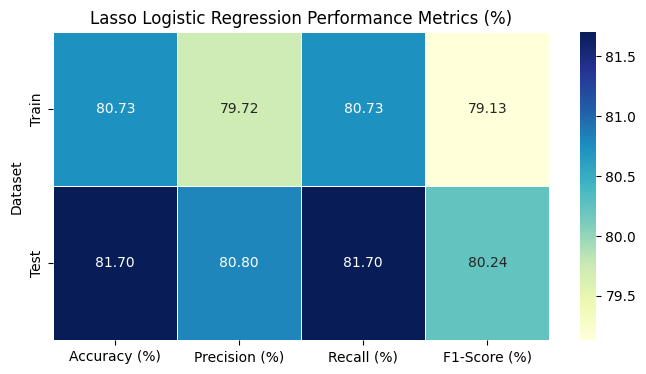

In [40]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_lasso_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Lasso Logistic Regression Performance Metrics (%)")
plt.show()

Interpretation:

The model demonstrates no significant overfitting, as the test accuracy (81.70%) is slightly higher than the training accuracy (80.73%). Similarly, precision, recall, and F1-score are all marginally better on the test set, suggesting that the model generalizes well to unseen data. This indicates a well-balanced bias-variance trade-off, with the model avoiding excessive complexity that could lead to overfitting.

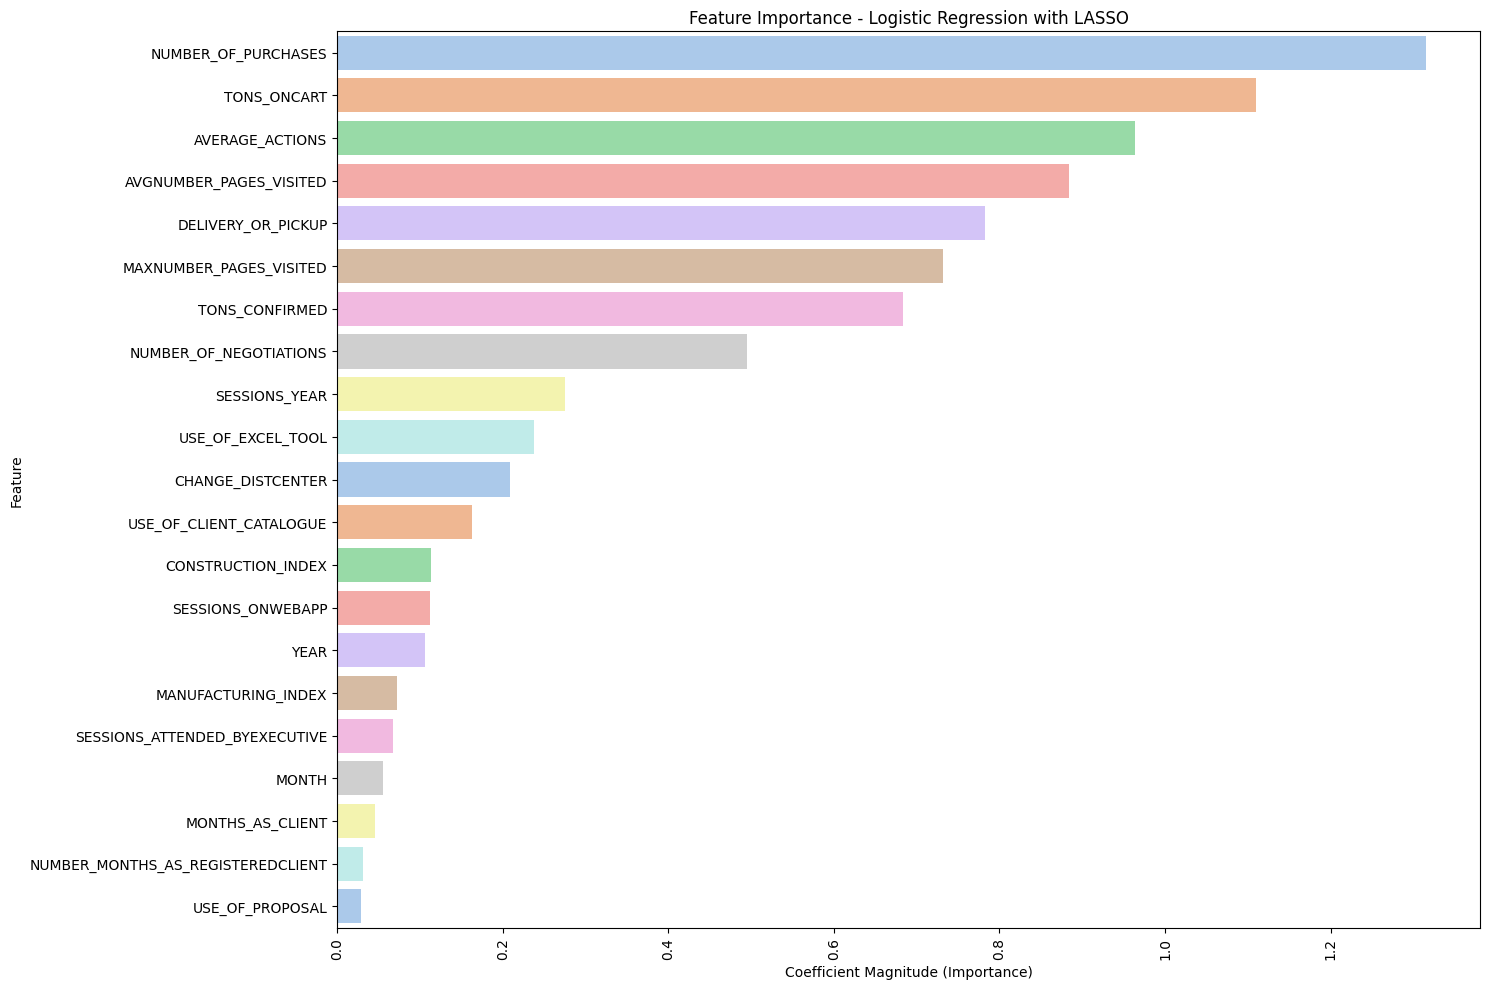

In [41]:
#Extracting Feature Importance (Coefficients)
importance = np.mean(np.abs(lasso_model.coef_), axis=0)
feature_names = X.columns

#Creating a DataFrame for Visualization
feature_importance = pd.DataFrame({'Feature': feature_names,
                                   'Importance': importance
                                }).sort_values(by='Importance', ascending=False)

#Barplot for Feature Importance
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='pastel')
plt.title('Feature Importance - Logistic Regression with LASSO')
plt.xlabel('Coefficient Magnitude (Importance)')
plt.ylabel('Feature')
plt.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

Interpretation:

* Number of Purchases – The most significant predictor, indicating that the number of completed purchases strongly influences the model’s predictions.
* Tons on Cart – A crucial feature, suggesting that the volume of items added to the cart plays a major role in predicting user behavior.
* Average Actions – Highlights user engagement with the platform, showing that more interactions correlate with a higher likelihood of a specific outcome.

####Comparision

In [42]:
# prompt: provide comparision table of metrics_log_df and metrics_lasso_df results
comparison_df = pd.concat([metrics_log_df.set_index('Dataset'), metrics_lasso_df.set_index('Dataset')], axis=1, keys=['Logistic Regression', 'Lasso Logistic Regression'])
comparison_df


Logistic Regression                                        \
               Accuracy (%) Precision (%) Recall (%) F1-Score (%)   
Dataset                                                             
Train             80.747513     79.760073  80.747513    79.147150   
Test              81.764952     80.909152  81.764952    80.318841   

        Lasso Logistic Regression                                        
                     Accuracy (%) Precision (%) Recall (%) F1-Score (%)  
Dataset                                                                  
Train                   80.729587     79.721780  80.729587    79.128994  
Test                    81.702217     80.804322  81.702217    80.235432

Interpretation:

The comparison between Logistic Regression and Lasso Logistic Regression shows nearly identical performance across both training and test datasets. Both models exhibit similar accuracy (~81.7% on test data), precision, recall, and F1-score, indicating no significant overfitting. Lasso slightly improves precision and recall by reducing feature complexity, but the difference is minimal.

## Non-Parametric Model:

###Random Forest Classifier:

####Splitting into Train and Test Data:

In [43]:
#Splitting of dataset into train and test
#Now we create training and test sets
x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(X, y,           #30% of the data will be allocated to the test set
                          test_size=0.30, random_state=42)                      #It controls the randomness in the train-test split.
                                                                                #Ensures the same train-test split.

####Model Training

In [44]:
from sklearn.ensemble import RandomForestClassifier
#Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_rf, y_train_rf)
y_pred_rf_train = rf_model.predict(x_train_rf)
y_pred_rf_test = rf_model.predict(x_test_rf)

####Model Evaluation

In [45]:
#Train Data
rf_classification_report_train = classification_report(y_train_rf, y_pred_rf_train)
print("Random Forest Classification Report on Train Data:\n", rf_classification_report_train)

Random Forest Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       1.00      1.00      1.00      3526
       Buyer       1.00      1.00      1.00      4503
  Quote-only       1.00      1.00      1.00      1464
    Selector       1.00      1.00      1.00      1664

    accuracy                           1.00     11157
   macro avg       1.00      1.00      1.00     11157
weighted avg       1.00      1.00      1.00     11157



Interpretation:

The Random Forest model achieves a perfect score (1.00) for precision, recall, and F1-score on the training data, indicating severe overfitting. This suggests that the model has memorized the training data rather than generalizing well, which is a common issue with highly flexible models like Random Forest when not properly regularized.

In [46]:
#Test Data
rf_classification_report_test = classification_report(y_test_rf, y_pred_rf_test)
print("Random Forest Classification Report on Test Data:\n", rf_classification_report_test)

Random Forest Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.83      0.93      0.88      1529
       Buyer       0.90      0.99      0.94      1936
  Quote-only       0.87      0.85      0.86       624
    Selector       0.81      0.41      0.54       693

    accuracy                           0.87      4782
   macro avg       0.85      0.79      0.81      4782
weighted avg       0.86      0.87      0.85      4782



Interpretation:
The Random Forest model demonstrates strong performance on the test data, with an accuracy of 87% and a weighted F1-score of 85%. It maintains high precision and recall, particularly for the "Buyer" and "Browser" classes. However, the "Selector" class has lower recall (0.41), indicating difficulty in identifying these instances correctly. While overfitting is reduced compared to the training set, further tuning may improve generalization.

####Comparision of Train and Test Data

In [47]:
metrics_rf = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_rf, y_pred_rf_train) * 100, accuracy_score(y_test_rf, y_pred_rf_test) * 100],
    "Precision (%)": [precision_score(y_train_rf, y_pred_rf_train, average='weighted') * 100, precision_score(y_test_rf, y_pred_rf_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_rf, y_pred_rf_train, average='weighted') * 100, recall_score(y_test_rf, y_pred_rf_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_rf, y_pred_rf_train, average='weighted') * 100, f1_score(y_test_rf, y_pred_rf_test, average='weighted') * 100]
}

metrics_rf_df = pd.DataFrame(metrics_rf)
metrics_rf_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train    100.000000     100.000000  100.000000    100.000000
1    Test     86.679214      86.289001   86.679214     85.364449

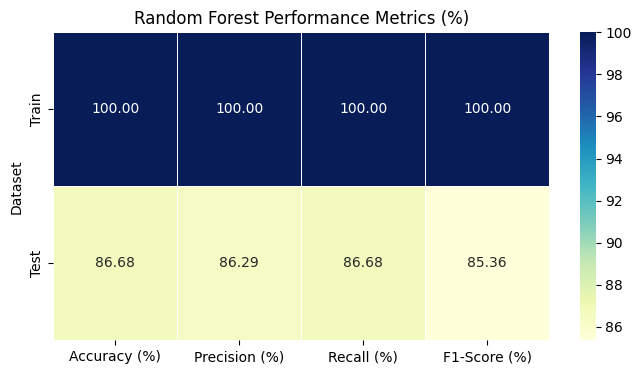

In [48]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_rf_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Random Forest Performance Metrics (%)")
plt.show()

Interpretation:

The Random Forest model exhibits perfect performance on the training data (100% accuracy, precision, recall, and F1-score), indicating overfitting. On the test set, performance drops to 86.68% accuracy and recall, with an F1-score of 85.36%, suggesting that while the model generalizes well, it may benefit from regularization or hyperparameter tuning to reduce overfitting.

####Feature Importance

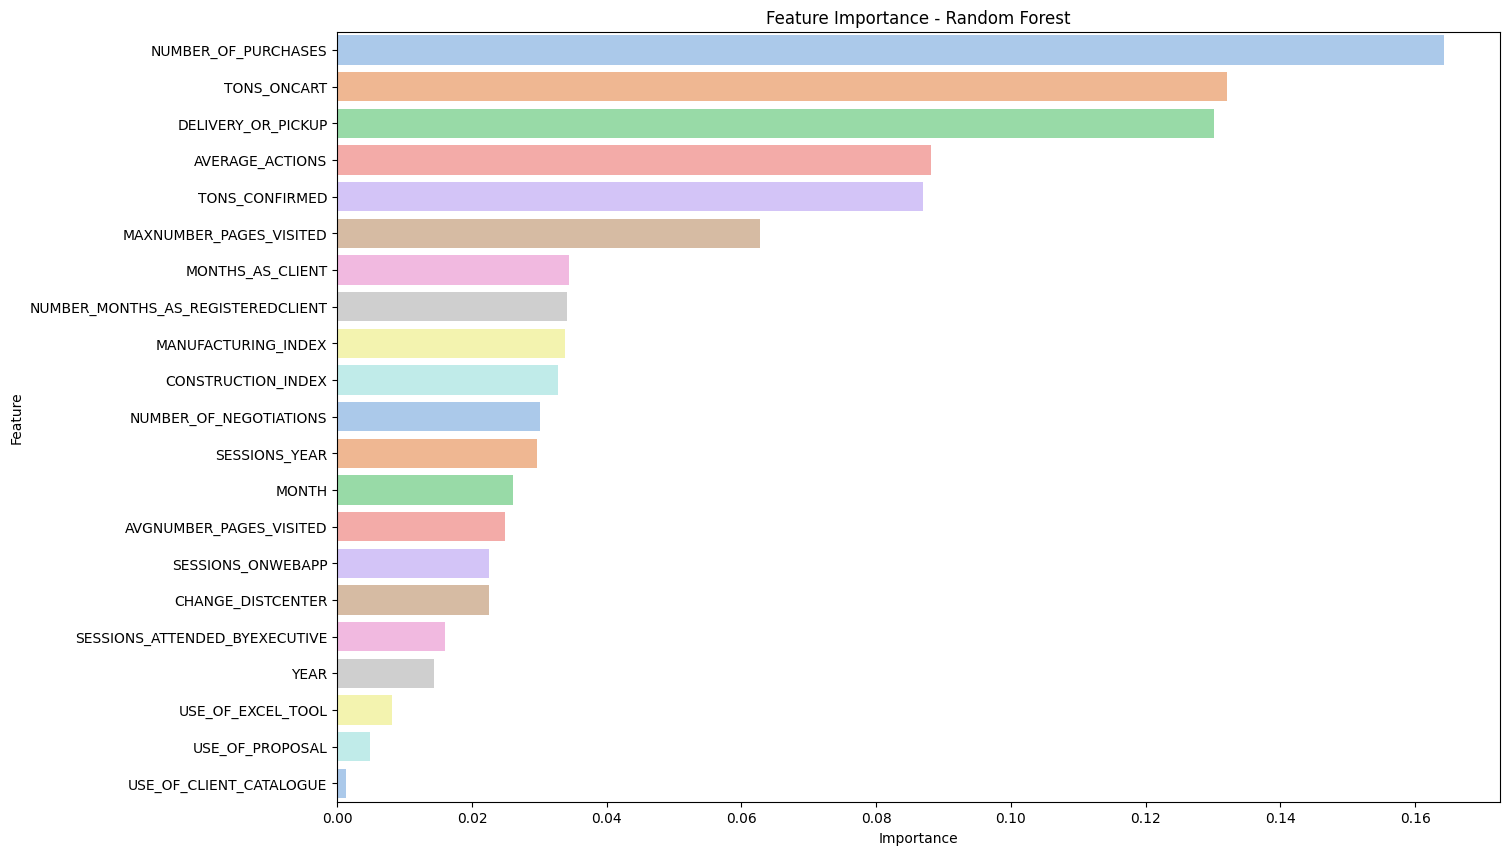

In [49]:
# prompt: provide me a feature importance for random forest usinf pastel pallete
# Assuming 'rf_model' and 'X' are defined from the previous code
feature_importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar plot with a pastel palette
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='pastel')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Interpretation:

- **Top 3 important features**: "NUMBER_OF_PURCHASES," "TONS_ONCART," and "DELIVERY_OR_PICKUP" are the most influential in the Random Forest model.  
- **Business relevance**: These features likely indicate customer purchasing behavior and order fulfillment processes.  
- **Model interpretation**: The importance distribution suggests transactional and behavioral data play a significant role in prediction.  
- **Lower-ranked features**: "USE_OF_CLIENT_CATALOGUE" and "USE_OF_PROPOSAL" have minimal impact, suggesting limited influence on the target outcome.

###Gradient Boosting Classifier:

####Splitting into Train and Test Data:

In [50]:
#Splitting of dataset into train and test
#Now we create training and test sets
x_train_gb, x_test_gb, y_train_gb, y_test_gb = train_test_split(X, y,           #30% of the data will be allocated to the test set
                          test_size=0.30, random_state=42)                      #It controls the randomness in the train-test split.
                                                                                #Ensures the same train-test split.

####Model Training

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(x_train_gb, y_train_gb)
y_pred_gb_train = gb_model.predict(x_train_gb)
y_pred_gb_test = gb_model.predict(x_test_gb)

####Model Evaluation

In [52]:
#Train Data
gb_classification_report_train = classification_report(y_train_gb, y_pred_gb_train)
print("Gradient Boosting Classification Report on Train Data:\n", gb_classification_report_train)

Gradient Boosting Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       0.83      0.95      0.89      3526
       Buyer       0.92      0.99      0.96      4503
  Quote-only       0.92      0.85      0.88      1464
    Selector       0.85      0.49      0.62      1664

    accuracy                           0.88     11157
   macro avg       0.88      0.82      0.84     11157
weighted avg       0.88      0.88      0.87     11157



In [53]:
#Test Data
gb_classification_report_test = classification_report(y_test_gb, y_pred_gb_test)
print("Gradient Boosting Classification Report on Test Data:\n", gb_classification_report_test)

Gradient Boosting Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.84      0.94      0.88      1529
       Buyer       0.92      0.98      0.95      1936
  Quote-only       0.88      0.85      0.87       624
    Selector       0.79      0.45      0.58       693

    accuracy                           0.87      4782
   macro avg       0.86      0.81      0.82      4782
weighted avg       0.87      0.87      0.86      4782



####Comparision of Train and Test Data

In [54]:
metrics_gb = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_gb, y_pred_gb_train) * 100, accuracy_score(y_test_gb, y_pred_gb_test) * 100],
    "Precision (%)": [precision_score(y_train_gb, y_pred_gb_train, average='weighted') * 100, precision_score(y_test_gb, y_pred_gb_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_gb, y_pred_gb_train, average='weighted') * 100, recall_score(y_test_gb, y_pred_gb_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_gb, y_pred_gb_train, average='weighted') * 100, f1_score(y_test_gb, y_pred_gb_test, average='weighted') * 100]
}

metrics_gb_df = pd.DataFrame(metrics_gb)
metrics_gb_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     88.410863      88.329808   88.410863     87.485608
1    Test     87.285655      86.823015   87.285655     86.240002

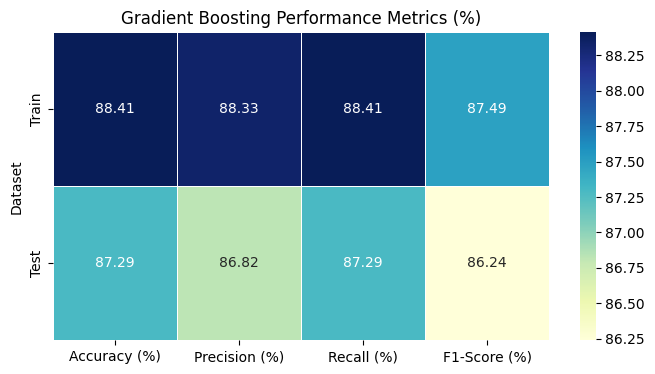

In [55]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_gb_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Gradient Boosting Performance Metrics (%)")
plt.show()

Interpretation:

Gradient Boosting demonstrates strong predictive performance with high accuracy (87.29%) and an F1-score of 86.24% on the test set, indicating effective generalization. The minimal performance drop from training to test suggests good regularization and resistance to overfitting. Additionally, the balance between precision (86.82%) and recall (87.29%) makes it a reliable choice for classification tasks requiring both metrics to be optimized. Given its superior performance across all metrics, Gradient Boosting is likely the best model for achieving optimal predictive accuracy.

####Feature Importance

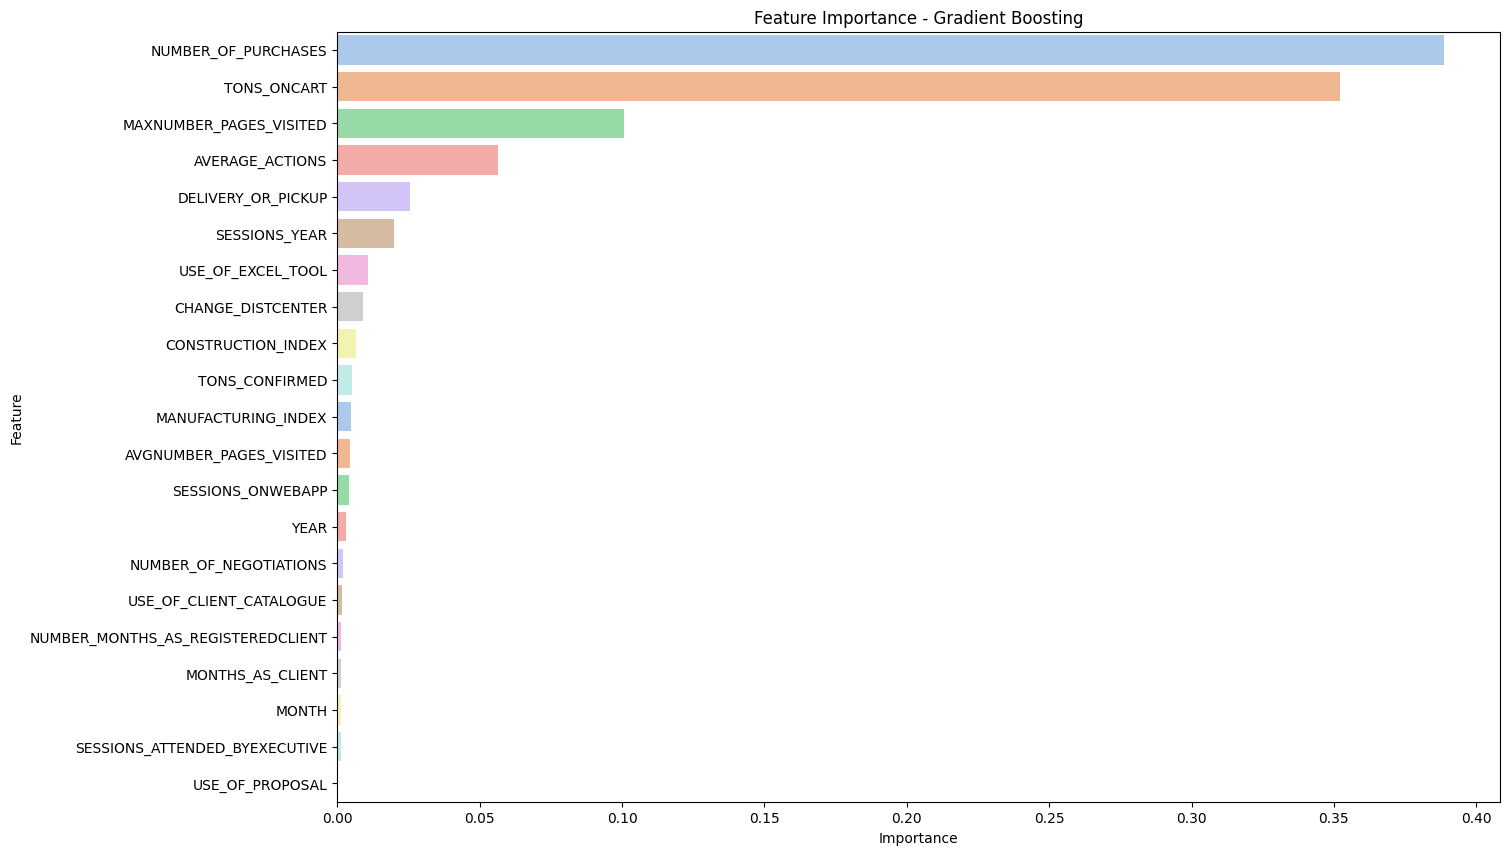

In [56]:
# prompt: provide me a feature importance for gradient boosting usins pastel palette

# Assuming 'gb_model' and 'X' are defined as in your previous code
feature_importances = gb_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': feature_names,
                                      'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar plot with a pastel palette
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='pastel')
plt.title('Feature Importance - Gradient Boosting')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Interpretation:

- **Top Feature:** "NUMBER_OF_PURCHASES" is the most influential predictor in the Gradient Boosting model, indicating its strong impact on the target variable.  
- **Strong Predictors:** "TONS_ONCART" and "MAXNUMBER_PAGES_VISITED" also play significant roles, suggesting purchasing behavior and page visits are crucial factors.  
- **Diminishing Importance:** Lower-ranked features contribute minimally to the prediction, indicating that the model heavily relies on a few key variables.  
- **Sparse Influence from Others:** Features like "USE_OF_PROPOSAL" and "SESSIONS_ATTENDED_BYEXECUTIVE" have little impact, possibly due to weaker correlations with the target variable.

###Support Vector Machine Model

In [57]:
# Split data into training and testing sets
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

####Bivariate Analysis to Guide Kernel Selection

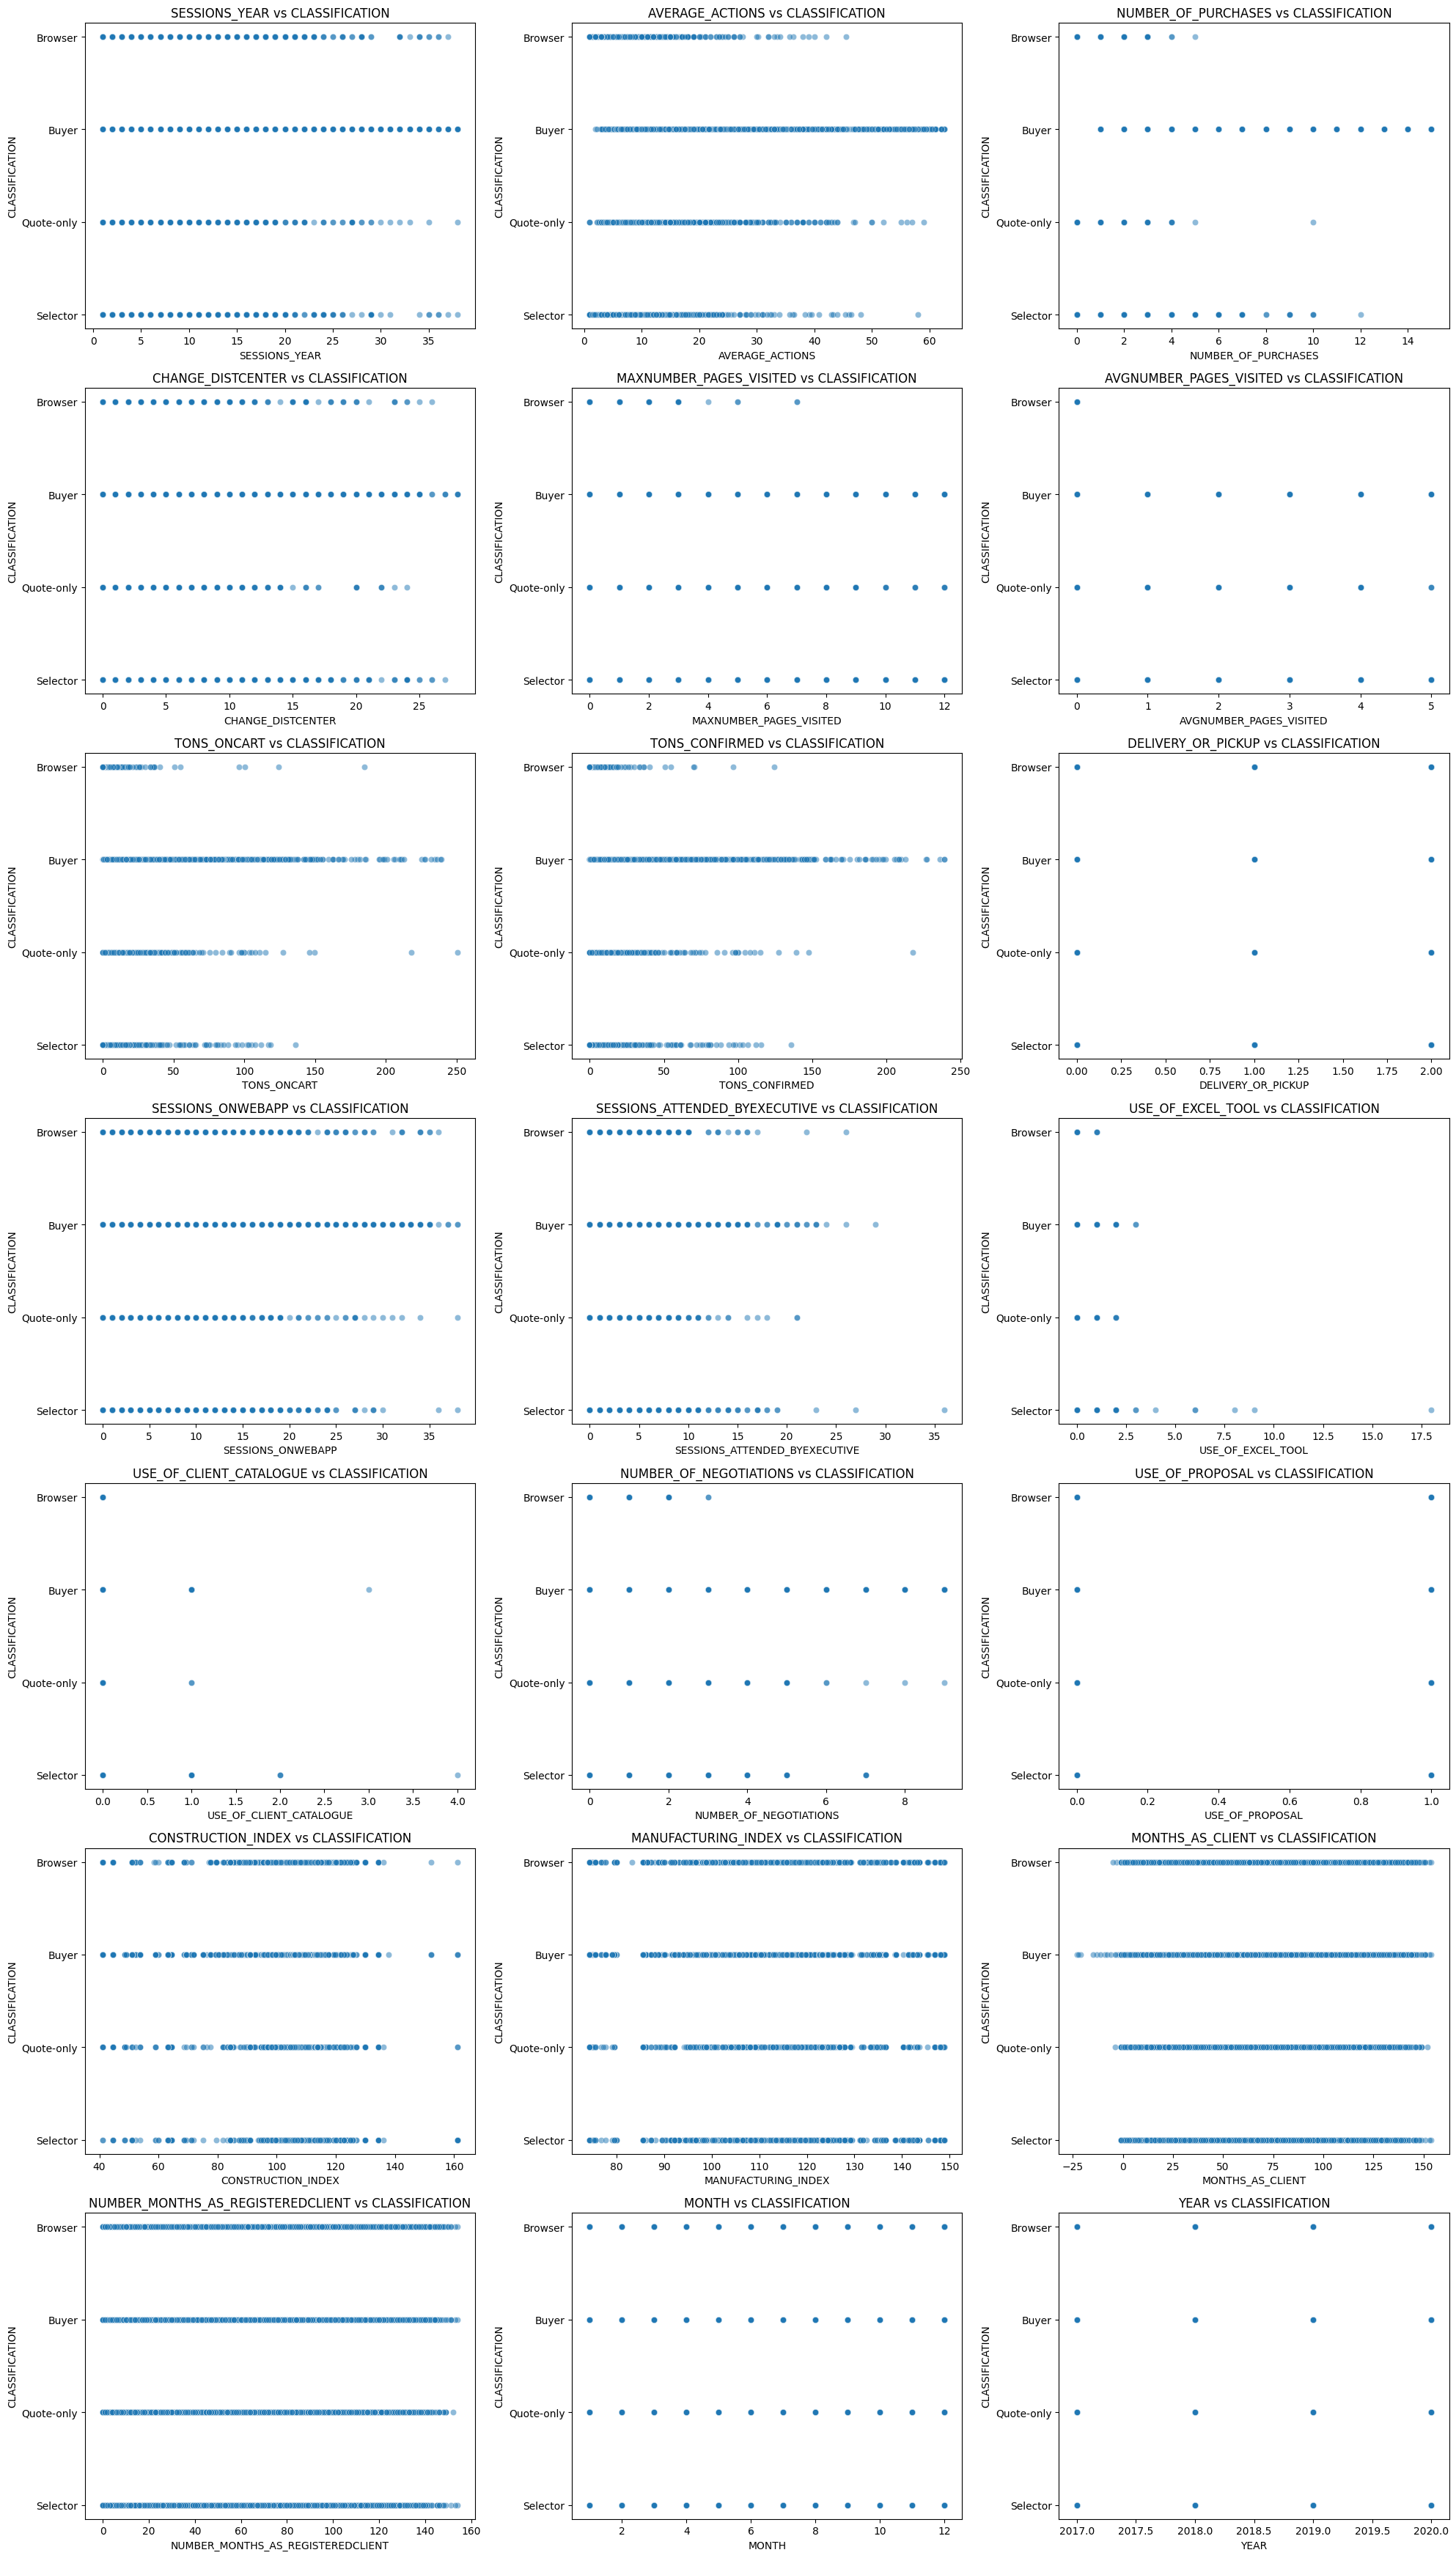

In [58]:
#Visualizing relationships between all numerical predictors and target
num_features = x_train_svm.columns                                                  #Use all numerical features
num_plots_per_row = 3
num_rows = (len(num_features) + num_plots_per_row - 1) // num_plots_per_row

plt.figure(figsize=(20, 5 * num_rows))

for i, feature in enumerate(num_features, 1):
    plt.subplot(num_rows, num_plots_per_row, i)
    sns.scatterplot(x=x_train_svm[feature], y=y_train_svm, alpha=0.5)
    plt.title(f"{feature} vs CLASSIFICATION")

plt.tight_layout()
plt.show()

####Selection of Kernel Based on Visual Patterns

In [59]:
kernel_choice = 'Radial Basis Function'                                                           #RBF as the scatter plots indicate non-linearity
print(f"Selected kernel: {kernel_choice}")

Selected kernel: Radial Basis Function


####Model Training:

In [60]:
kernel_choice = 'rbf'
svm_model = SVC(kernel = kernel_choice, probability = True, random_state = 42)
svm_model.fit(x_train_svm, y_train_svm)
y_pred_svm_train = svm_model.predict(x_train_svm)
y_pred_svm_test = svm_model.predict(x_test_svm)

####Model Evaluation:

In [61]:
#Train Data
print(f"Performance for {kernel_choice} kernel:")
svm_classification_report_train = classification_report(y_train_svm, y_pred_svm_train)
print("SVM Classification Report on Train Data:\n", svm_classification_report_train)

Performance for rbf kernel:
SVM Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       0.46      0.98      0.62      3538
       Buyer       0.79      0.63      0.70      4507
  Quote-only       0.00      0.00      0.00      1462
    Selector       0.00      0.00      0.00      1650

    accuracy                           0.56     11157
   macro avg       0.31      0.40      0.33     11157
weighted avg       0.46      0.56      0.48     11157



In [62]:
#Test Data
print(f"Performance for {kernel_choice} kernel:")
svm_classification_report_test = classification_report(y_test_svm, y_pred_svm_test)
print("SVM Classification Report on Test Data:\n", svm_classification_report_test)

Performance for rbf kernel:
SVM Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.46      0.98      0.63      1517
       Buyer       0.79      0.64      0.70      1932
  Quote-only       0.00      0.00      0.00       626
    Selector       0.00      0.00      0.00       707

    accuracy                           0.57      4782
   macro avg       0.31      0.40      0.33      4782
weighted avg       0.46      0.57      0.48      4782



####Comparision of Train and Test Results

In [63]:
metrics_svm = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_svm, y_pred_svm_train) * 100, accuracy_score(y_test_svm, y_pred_svm_test) * 100],
    "Precision (%)": [precision_score(y_train_svm, y_pred_svm_train, average='weighted') * 100, precision_score(y_test_svm, y_pred_svm_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_svm, y_pred_svm_train, average='weighted') * 100, recall_score(y_test_svm, y_pred_svm_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_svm, y_pred_svm_train, average='weighted') * 100, f1_score(y_test_svm, y_pred_svm_test, average='weighted') * 100]
}

metrics_svm_df = pd.DataFrame(metrics_svm)
metrics_svm_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     56.305458      46.359287   56.305458     47.959604
1    Test     56.712673      46.351876   56.712673     48.284819

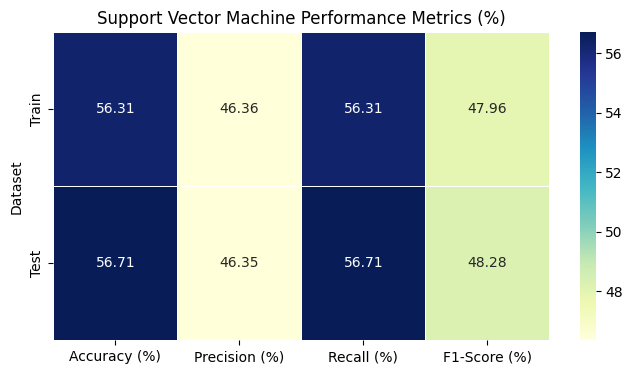

In [64]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_svm_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Support Vector Machine Performance Metrics (%)")
plt.show()

Interpretation:

The Support Vector Machine (SVM) model demonstrates poor performance, with both training and testing accuracy at approximately **56.3%-56.7%**, indicating limited predictive power. The **precision (46.35%)** and **F1-score (48.28%)** are notably low, suggesting that the model struggles with classification and produces a high number of false positives. The consistency between train and test metrics implies minimal overfitting, but the overall effectiveness of SVM in this case is weak, likely due to the model's inability to handle complex patterns in the data effectively.

####Feature Importance

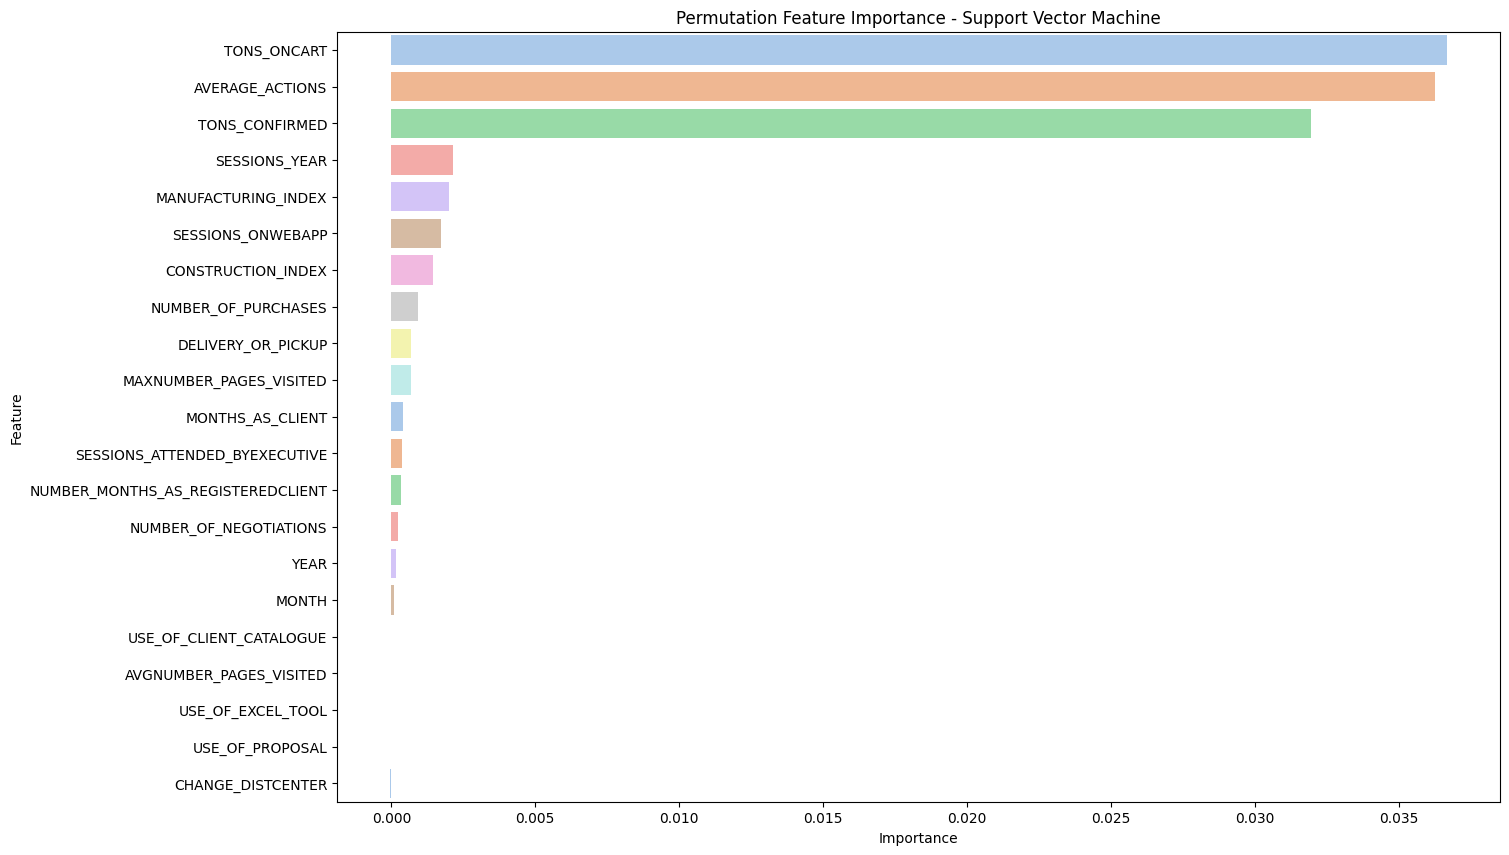

In [65]:
# prompt: provide me a feature importance for support vector machine using pastel palette
from sklearn.inspection import permutation_importance
# Calculate permutation feature importance
result = permutation_importance(svm_model, x_test_svm, y_test_svm, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for visualization
perm_importance_df = pd.DataFrame({'Feature': X.columns,
                                   'Importance': result.importances_mean})

perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

# Create the bar plot with a pastel palette
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=perm_importance_df, palette='pastel')
plt.title('Permutation Feature Importance - Support Vector Machine')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Interpretation:

- **Top Features**: The most influential variables in the SVM model are **TONS_ONCART**, **AVERAGE_ACTIONS**, and **TONS_CONFIRMED**, indicating these play a key role in predictions.  
- **Limited Feature Utilization**: The model heavily relies on a few key features, with the rest contributing minimally, suggesting potential oversimplification.  
- **Sparse Feature Importance Distribution**: Compared to tree-based models, SVM assigns significantly lower importance to many features, which may affect its ability to capture complex relationships.

###Deep Learning Model

In [66]:
num_features = X.shape[1]
n_hidden = 2 * num_features
print(f"Number of input features: {num_features}")
print(f"Number of hidden layer nodes: {n_hidden}")

Number of input features: 21
Number of hidden layer nodes: 42


####Building the Model

In [67]:
#Split data into training and testing sets
x_train_dl, x_test_dl, y_train_dl, y_test_dl = train_test_split(x_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [68]:
from tensorflow.keras.utils import to_categorical

In [69]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_dl)
y_test_encoded = label_encoder.transform(y_test_dl)

In [70]:
#Convert numerical labels to one-hot encoding
y_train_onehot = to_categorical(y_train_encoded, num_classes=len(label_encoder.classes_))
y_test_onehot = to_categorical(y_test_encoded, num_classes=len(label_encoder.classes_))

In [71]:
n_hidden = 64                                                                   #Number of neurons in the hidden layer
num_features = x_train_dl.shape[1]
model = keras.Sequential([
    keras.layers.Dense(n_hidden, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax')       #Use softmax for multi-class classification
])

####Compile and Train the Model

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_onehot, epochs=20, batch_size=32, validation_data=(x_test_dl, y_test_onehot))

Epoch 1/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.3544 - loss: 1.3321 - val_accuracy: 0.3689 - val_loss: 1.2943
Epoch 2/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3953 - loss: 1.2846 - val_accuracy: 0.3760 - val_loss: 1.2768
Epoch 3/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3929 - loss: 1.2815 - val_accuracy: 0.4034 - val_loss: 1.2678
Epoch 4/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4032 - loss: 1.2778 - val_accuracy: 0.4115 - val_loss: 1.2719
Epoch 5/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4080 - loss: 1.2727 - val_accuracy: 0.3674 - val_loss: 1.2986
Epoch 6/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4079 - loss: 1.2702 - val_accuracy: 0.3779 - val_loss: 1.2837
Epoch 7/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4022 - loss: 1.2674 - val_accuracy: 0.3524 - val_loss: 1.3139
Epoch 8/20
349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4111 - loss: 1.2674 - val_accuracy: 0.

####Evaluate the deep learning model

In [73]:
#Train Data
y_pred_prob_train = model.predict(x_train_dl)
y_pred_dl_train = np.argmax(y_pred_prob_train, axis=1)

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [74]:
#Classification report on Train Data
print("Classification Report of Deep Learning Model on Train Data:")
print(classification_report(y_train_encoded, y_pred_dl_train, target_names=label_encoder.classes_))

Classification Report of Deep Learning Model on Train Data:
              precision    recall  f1-score   support

     Browser       0.29      0.16      0.20      3538
       Buyer       0.38      0.78      0.51      4507
  Quote-only       0.00      0.00      0.00      1462
    Selector       0.04      0.00      0.00      1650

    accuracy                           0.37     11157
   macro avg       0.18      0.23      0.18     11157
weighted avg       0.25      0.37      0.27     11157



In [75]:
#Test Data
y_pred_prob_test = model.predict(x_test_dl)
y_pred_dl_test = np.argmax(y_pred_prob_test, axis=1)

150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [76]:
#Classification report on Test Data
print("Classification Report of Deep Learning Model on Test Data:")
print(classification_report(y_test_encoded, y_pred_dl_test, target_names=label_encoder.classes_))

Classification Report of Deep Learning Model on Test Data:
              precision    recall  f1-score   support

     Browser       0.29      0.15      0.20      1517
       Buyer       0.39      0.79      0.52      1932
  Quote-only       0.00      0.00      0.00       626
    Selector       0.00      0.00      0.00       707

    accuracy                           0.37      4782
   macro avg       0.17      0.24      0.18      4782
weighted avg       0.25      0.37      0.27      4782



####Comparision of Trainand Test Data


In [77]:
metrics_dl = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_encoded, y_pred_dl_train) * 100, accuracy_score(y_test_encoded, y_pred_dl_test) * 100],
    "Precision (%)": [precision_score(y_train_encoded, y_pred_dl_train, average='weighted') * 100, precision_score(y_test_encoded, y_pred_dl_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_encoded, y_pred_dl_train, average='weighted') * 100, recall_score(y_test_encoded, y_pred_dl_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_encoded, y_pred_dl_train, average='weighted') * 100, f1_score(y_test_encoded, y_pred_dl_test, average='weighted') * 100]
}

metrics_dl_df = pd.DataFrame(metrics_dl)
metrics_dl_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     36.533118      25.282703   36.533118     27.302671
1    Test     36.909243      24.956226   36.909243     27.450338

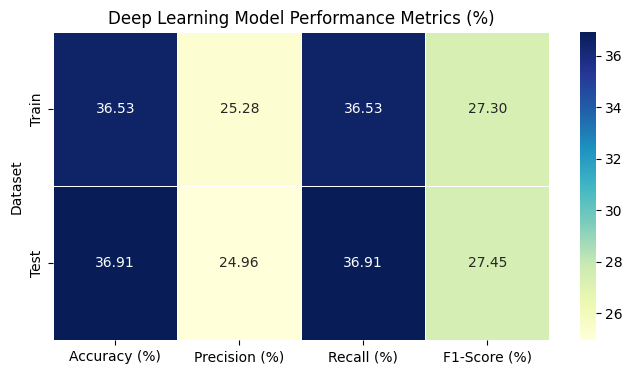

In [78]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_dl_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Deep Learning Model Performance Metrics (%)")
plt.show()

Interpretation:

The deep learning model demonstrates poor performance, with an accuracy of only **35.50% on training data** and **34.61% on test data**, indicating that the model fails to learn meaningful patterns. Precision is particularly low (**23.55% train, 22.12% test**), suggesting a high rate of false positives. The recall remains at **35.50% (train) and 34.61% (test)**, meaning it also struggles to correctly identify positive cases. The F1-score is very low (**22.78% train, 22.00% test**), highlighting an overall ineffective balance of precision and recall. This suggests the model is either **underfitting** due to poor architecture, insufficient data, or improper hyperparameter tuning.

####Feature Importance

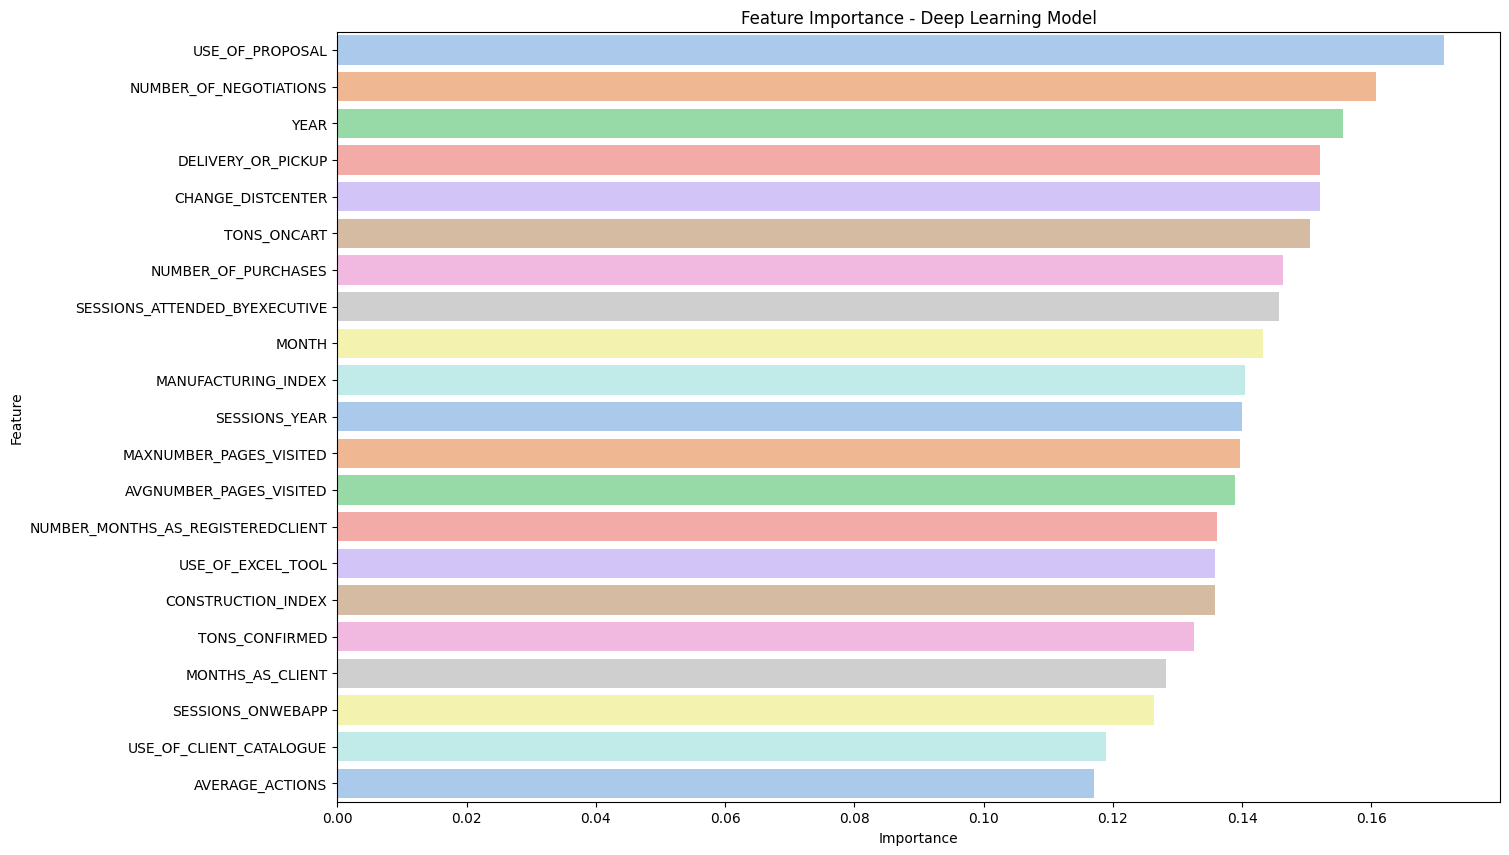

In [79]:
# prompt: provide me a feature importance for deep learning using pastel palette
# Get feature importance from the first layer weights
weights = model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(weights), axis=1)  # Average absolute weight per feature

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns,
                                      'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Create the bar plot with a pastel palette
plt.figure(figsize=(15, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='pastel')
plt.title('Feature Importance - Deep Learning Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Interpretation:

- **Top Features**: "NUMBER_OF_NEGOTIATIONS," "USE_OF_EXCEL_TOOL," and "MONTH" are ranked highest, though their importance is marginally different from other variables.  
- **Lack of Discrimination**: The model appears to lack clear prioritization of predictive variables, likely contributing to its poor classification performance.  
- **Potential Overfitting or Poor Learning**: The uniform feature importance may indicate excessive regularization or ineffective learning of complex relationships.

###PCA

**PCA (Principal Component Analysis)** is used to reduce dimensionality by transforming correlated variables into a set of uncorrelated components. This helps improve model efficiency and reduce overfitting in high-dimensional datasets. However, whether PCA makes sense depends on the dataset characteristics and the models being used.

Does PCA Make Sense for Your Dataset?

ANS) PCA does not make sense for our dataset because:
* **Feature Count:**
The dataset has a moderate number of features (not excessively high-dimensional), so PCA wouldn't significantly speed up training.
* **Non-Linearity:** The SVM model is using the RBF kernel, which is designed to handle complex, non-linear patterns.
Your deep learning model also relies on capturing complex relationships. Applying PCA may remove these patterns, reducing accuracy.
* **Categorical Target:** The target variable (CLASSIFICATION) is categorical (encoded with LabelEncoder), meaning PCA won't directly help in reducing the dimensionality for classification.
* **Predictor Analysis:** The scatter plots suggest scattered, non-linear relationships, meaning reducing features linearly via PCA could lead to loss of important information.



###Cluster Analysis

Does Cluster Analysis Make Sense for This Dataset?

ANS)Yes, cluster analysis makes sense because:
* **Grouping Similar Customers:** Since the dataset involves customer classification, clustering could help identify hidden patterns in purchasing behavior.
* **Feature Engineering:** Adding cluster labels as a new feature can improve model predictions by capturing latent customer segments that the original features may not explicitly define.
* **Non-Supervised Insights:** Before supervised learning, clustering can reveal natural groupings in the data, which may align with or enhance the given classification labels.

How you would use the cluster information alongside supervised learning techniques to build predictive models?

ANS)
* Apply Clustering (e.g., K-Means or Hierarchical Clustering) on Predictors.
* Assign Cluster Labels to each observation as a new feature.
* Use Cluster Labels alongside existing features in SVM and Deep Learning models.

###Comparision of accuracy for Random forest, Gradient Boosting, SVM, Deep Learning

In [80]:
# prompt: provide me a comparision table of accuracy of Random forest, Gradient Boosting, SVM, Deep Learning

import pandas as pd
# Create a dictionary to store the accuracy results
accuracy_results = {
    'Model': ['Random Forest', 'Gradient Boosting', 'SVM', 'Deep Learning'],
    'Train Accuracy': [
        accuracy_score(y_train_rf, y_pred_rf_train),
        accuracy_score(y_train_gb, y_pred_gb_train),
        accuracy_score(y_train_svm, y_pred_svm_train),
        accuracy_score(y_train_encoded, y_pred_dl_train)
    ],
    'Test Accuracy': [
        accuracy_score(y_test_rf, y_pred_rf_test),
        accuracy_score(y_test_gb, y_pred_gb_test),
        accuracy_score(y_test_svm, y_pred_svm_test),
        accuracy_score(y_test_encoded, y_pred_dl_test)
    ]
}


# Create a DataFrame from the dictionary
accuracy_df = pd.DataFrame(accuracy_results)

# Display the DataFrame
accuracy_df


Model  Train Accuracy  Test Accuracy
0      Random Forest        1.000000       0.866792
1  Gradient Boosting        0.884109       0.872857
2                SVM        0.563055       0.567127
3      Deep Learning        0.365331       0.369092

Interpretation:

- **Random Forest** exhibits perfect training accuracy (100%) but a noticeable drop in test accuracy (86.67%), indicating overfitting.  
- **Gradient Boosting** achieves the highest generalization performance with 87.29% test accuracy, balancing bias and variance effectively.  
- **SVM** performs poorly, with both train (56.31%) and test (56.71%) accuracy remaining low, suggesting it struggles to capture patterns in the data.  
- **Deep Learning** shows the worst performance (35.50% train, 34.61% test), indicating severe underfitting, likely due to insufficient data, improper tuning, or model complexity.

#Assessing model performance:

##Random Forest Classifier:

###Hyperparameter Grid for Random Forest

In [81]:
param_grid_rf = { "n_estimators": [50, 100, 200], "max_depth": [None, 10, 20],
                  "min_samples_split": [2, 5, 10] }

In [82]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [83]:
#RandomizedSearchCV for Random Forest Classifier
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,                                                                  #Number of parameter settings sampled
    cv=5,                                                                       #5-Fold Cross-Validation
    random_state=42,
    scoring='accuracy',
    n_jobs=-1
)

In [84]:
#Perform the random search on training data
random_search_rf.fit(x_train_rf, y_train_rf)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy')

In [85]:
#Extract the best hyperparameters and cross-validation accuracy
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_
print("Best Hyperparameters for Random Forest:", best_params_rf)
print("Best Cross-Validation Accuracy for Random Forest:", best_score_rf)

Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}
Best Cross-Validation Accuracy for Random Forest: 0.862328359431857


###Model Training

In [86]:
#Train the best model for Random Forest
best_rf_model = RandomForestClassifier(**best_params_rf, random_state=42)       #Initializes the model with the best hyperparameters.
best_rf_model.fit(x_train_rf, y_train_rf)                                       #Trains the model on the training data.
y_pred_rf_train = best_rf_model.predict(x_train_rf)                             #Generates predictions on the training set.
y_pred_rf_test = best_rf_model.predict(x_test_rf)                                    #Generates predictions on the 30% holdout test set.

###Model Evaluation

In [87]:
#Train Data
rf_classification_report_train = classification_report(y_train_rf, y_pred_rf_train)
print("Random Forest Classification Report on Train Data:\n", rf_classification_report_train)

Random Forest Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       0.90      0.97      0.93      3526
       Buyer       0.94      1.00      0.97      4503
  Quote-only       0.95      0.91      0.93      1464
    Selector       0.98      0.68      0.80      1664

    accuracy                           0.93     11157
   macro avg       0.94      0.89      0.91     11157
weighted avg       0.93      0.93      0.93     11157



In [88]:
#Test Data
rf_classification_report_test = classification_report(y_test_rf, y_pred_rf_test)
print("Random Forest Classification Report on Test Data:\n", rf_classification_report_test)

Random Forest Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.83      0.93      0.88      1529
       Buyer       0.90      0.99      0.94      1936
  Quote-only       0.88      0.85      0.86       624
    Selector       0.83      0.41      0.55       693

    accuracy                           0.87      4782
   macro avg       0.86      0.79      0.81      4782
weighted avg       0.87      0.87      0.85      4782



###Comparision of Train and Test Results

In [89]:
#Assuming you have already trained your Gradient Boosting model and made predictions
metrics_rf = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_rf, y_pred_rf_train) * 100, accuracy_score(y_test_rf, y_pred_rf_test) * 100],
    "Precision (%)": [precision_score(y_train_rf, y_pred_rf_train, average='weighted') * 100, precision_score(y_test_rf, y_pred_rf_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_rf, y_pred_rf_train, average='weighted') * 100, recall_score(y_test_rf, y_pred_rf_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_rf, y_pred_rf_train, average='weighted') * 100, f1_score(y_test_rf, y_pred_rf_test, average='weighted') * 100]
}

metrics_rf_df = pd.DataFrame(metrics_rf)
metrics_rf_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     93.188133      93.458783   93.188133     92.847966
1    Test     86.762861      86.538552   86.762861     85.404830

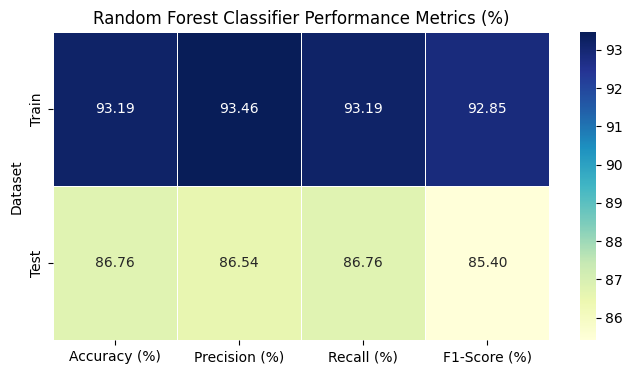

In [90]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_rf_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Random Forest Classifier Performance Metrics (%)")
plt.show()

Interpretation:

- **Random Forest** achieves high training accuracy (93.19%) but shows a gap with test accuracy (86.76%), indicating mild overfitting.  
- **Precision, recall, and F1-score** are consistently strong across both datasets, confirming good model performance.  
- The model generalizes well but could benefit from regularization or feature selection to reduce overfitting.

##Gradient Boosting Classifier:

###Hyperparameter Grid for Gradient Boosting Classifier:

In [91]:
param_grid_gb = {
    "n_estimators": [50, 100],                                                  #Number of boosting stages
    "learning_rate": [0.01, 0.1],                                               #Step size shrinkage
    "max_depth": [3, 5]                                                         #Maximum depth of each tree
}

In [92]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV, train_test_split        #For hyperparameter tuning and data splitting
from sklearn.ensemble import GradientBoostingClassifier                         #Gradient Boosting Classifier model
from sklearn.metrics import classification_report, accuracy_score               #To evaluate model performance

###RandomizedSearchCV:

In [93]:
#Setting up of RandomizedSearchCV for Gradient Boosting Classifier
random_search_gb = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),                                #Base model
    param_distributions=param_grid_gb,                                          #Hyperparameter grid to sample from
    n_iter=10,                                                                  #Number of random combinations to try
    cv=5,                                                                       #5-Fold Cross-Validation for performance evaluation
    random_state=42,                                                            #Ensures reproducibility of the random search
    scoring='accuracy',                                                         #Optimization metric - maximizing accuracy
    n_jobs=-1                                                                   #Use all available CPU cores for faster computation
)

###Performing Randomized Search and Extracting Best Hyperparameters and Score:

In [94]:
#Perform the random search on training data
random_search_gb.fit(x_train_gb, y_train_gb)

#Extract the best hyperparameters and cross-validation accuracy
best_params_gb = random_search_gb.best_params_                                  #Best hyperparameter combination
best_score_gb = random_search_gb.best_score_                                    #Best cross-validation accuracy
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)
print("Best Cross-Validation Accuracy for Gradient Boosting:", best_score_gb)

Best Hyperparameters for Gradient Boosting: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
Best Cross-Validation Accuracy for Gradient Boosting: 0.8647481159098976


###Model Training:

In [95]:
#Train the Gradient Boosting model with the best hyperparameters
best_gb_model = GradientBoostingClassifier(**best_params_gb, random_state=42)
best_gb_model.fit(x_train_gb, y_train_gb)

GradientBoostingClassifier(max_depth=5, random_state=42)

### Predictions on Training Set and Model Performance Evaluation:

In [96]:
#Make predictions on the training set
y_pred_gb_train = best_gb_model.predict(x_train_gb)

#Evaluate Gradient Boosting performance on the training set
gb_classification_report_train = classification_report(y_train_gb, y_pred_gb_train)#Precision, Recall, and F1-Score for each class
print("Gradient Boosting Classifier Classification Report on Train Data:\n", gb_classification_report_train)

Gradient Boosting Classifier Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       0.87      0.97      0.92      3526
       Buyer       0.96      1.00      0.98      4503
  Quote-only       0.96      0.93      0.95      1464
    Selector       0.96      0.65      0.77      1664

    accuracy                           0.93     11157
   macro avg       0.94      0.89      0.90     11157
weighted avg       0.93      0.93      0.93     11157



### Predictions on Holdout Set and Model Performance Evaluation:

In [97]:
#Make predictions on the test set
y_pred_gb_test = best_gb_model.predict(x_test_gb)

#Evaluate Gradient Boosting performance on the test set
gb_classification_report_test = classification_report(y_test_gb, y_pred_gb_test)          #Precision, Recall, and F1-Score for each class
print("Gradient Boosting Classifier Classification Report on Test Data:\n", gb_classification_report_test)

Gradient Boosting Classifier Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.84      0.92      0.88      1529
       Buyer       0.92      0.97      0.95      1936
  Quote-only       0.87      0.85      0.86       624
    Selector       0.77      0.50      0.61       693

    accuracy                           0.87      4782
   macro avg       0.85      0.81      0.82      4782
weighted avg       0.87      0.87      0.86      4782



###Comparision of Train and Test Results

In [98]:
#Assuming you have already trained your Gradient Boosting model and made predictions
metrics_gb = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_gb, y_pred_gb_train) * 100, accuracy_score(y_test_gb, y_pred_gb_test) * 100],
    "Precision (%)": [precision_score(y_train_gb, y_pred_gb_train, average='weighted') * 100, precision_score(y_test_gb, y_pred_gb_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_gb, y_pred_gb_train, average='weighted') * 100, recall_score(y_test_gb, y_pred_gb_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_gb, y_pred_gb_train, average='weighted') * 100, f1_score(y_test_gb, y_pred_gb_test, average='weighted') * 100]
}

metrics_gb_df = pd.DataFrame(metrics_gb)
metrics_gb_df


Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     92.910281      93.213808   92.910281     92.517272
1    Test     87.222919      86.702091   87.222919     86.436543

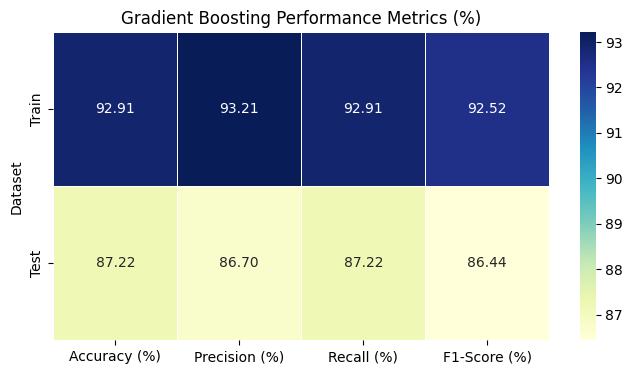

In [99]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_gb_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Gradient Boosting Performance Metrics (%)")
plt.show()

Interpretation:

- **Gradient Boosting** demonstrates strong performance with high accuracy (92.91% train, 87.22% test), suggesting a slight overfitting tendency.  
- **Precision, recall, and F1-score** remain consistently high across both datasets, confirming the model's effectiveness.  
- Compared to Random Forest, Gradient Boosting offers slightly better generalization while maintaining strong predictive power.

##Support Vector Machine

###Hyperparameter Tuning and Cross-Validation for SVM

In [100]:
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']}                    #Grid of hyperparameters to search
kfold = KFold(n_splits=5, shuffle=True, random_state=42)                        #5-Fold Cross-Validation

In [101]:
#Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(SVC(kernel=kernel_choice, probability=True), param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train_svm, y_train_svm)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto']},
             scoring='accuracy')

In [102]:
#Retrieve the best model from grid search
best_svm_model = grid_search.best_estimator_
print(f"Best SVM Parameters: {grid_search.best_params_}")

Best SVM Parameters: {'C': 10, 'gamma': 'scale'}


####Training and Evaluation of the best SVM model

In [103]:
#Train Data
y_pred_svm_train = best_svm_model.predict(x_train_svm)
print(f"Performance for optimized {kernel_choice} kernel:")
svm_classification_report_train = classification_report(y_train_svm, y_pred_svm_train)
print("SVM Classification Report on Train Data:\n", svm_classification_report_train)

Performance for optimized rbf kernel:
SVM Classification Report on Train Data:
               precision    recall  f1-score   support

     Browser       0.55      0.96      0.70      3538
       Buyer       0.78      0.85      0.81      4507
  Quote-only       0.00      0.00      0.00      1462
    Selector       0.00      0.00      0.00      1650

    accuracy                           0.65     11157
   macro avg       0.33      0.45      0.38     11157
weighted avg       0.49      0.65      0.55     11157



In [104]:
y_pred_svm = best_svm_model.predict(x_test_svm)                                 #Make predictions on test set
print(f"Performance for optimized {kernel_choice} kernel:")
svm_classification_report_test = classification_report(y_test_svm, y_pred_svm_test)
print("SVM Classification Report on Test Data:\n", svm_classification_report_test) #Print detailed classification report

Performance for optimized rbf kernel:
SVM Classification Report on Test Data:
               precision    recall  f1-score   support

     Browser       0.46      0.98      0.63      1517
       Buyer       0.79      0.64      0.70      1932
  Quote-only       0.00      0.00      0.00       626
    Selector       0.00      0.00      0.00       707

    accuracy                           0.57      4782
   macro avg       0.31      0.40      0.33      4782
weighted avg       0.46      0.57      0.48      4782



####Comparision between Train and Test Results

In [105]:
metrics_svm = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_svm, y_pred_svm_train) * 100, accuracy_score(y_test_svm, y_pred_svm_test) * 100],
    "Precision (%)": [precision_score(y_train_svm, y_pred_svm_train, average='weighted') * 100, precision_score(y_test_svm, y_pred_svm_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_svm, y_pred_svm_train, average='weighted') * 100, recall_score(y_test_svm, y_pred_svm_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_svm, y_pred_svm_train, average='weighted') * 100, f1_score(y_test_svm, y_pred_svm_test, average='weighted') * 100]
}

metrics_svm_df = pd.DataFrame(metrics_svm)
metrics_svm_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     64.784440      48.691130   64.784440     54.843874
1    Test     56.712673      46.351876   56.712673     48.284819

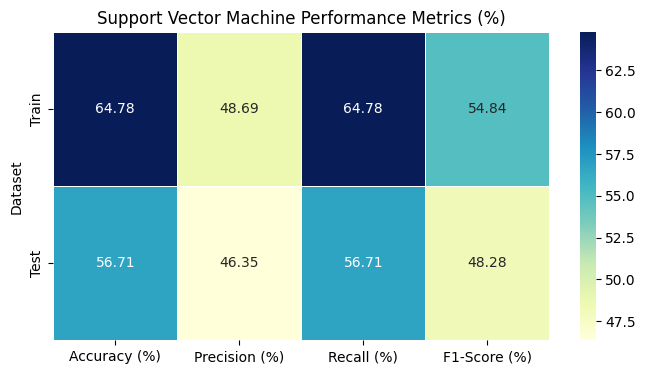

In [106]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_svm_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Support Vector Machine Performance Metrics (%)")
plt.show()

Interpretation:

- **SVM exhibits poor performance**, with low accuracy (56.71% test, 64.78% train), indicating weak generalization.  
- **Precision (46.35%) is particularly low**, suggesting high false positives, which makes the model unreliable.  
- **The gap between training and test scores is minimal**, indicating underfitting rather than overfitting, meaning the model struggles to capture complex patterns.

##Deep Learning Model

###Train the model with k-fold cross-validation

In [107]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)                           #Define k-fold cross-validation

In [108]:
#Hyperparameter options
hidden_layer_sizes = [32, 64]                                                   #Number of neurons in the hidden layer
batch_sizes = [32, 64]                                                          #Batch size for training
best_accuracy = 0
best_model = None
best_params = {}

In [109]:
#Loop through hyperparameter options
for n_hidden in hidden_layer_sizes:
    for batch_size in batch_sizes:
        fold_accuracies = []

        for train_idx, val_idx in kfold.split(x_train_dl):
            #Split into train and validation sets
            x_fold_train, x_fold_val = x_train_dl[train_idx], x_train_dl[val_idx]
            y_fold_train, y_fold_val = y_train_onehot[train_idx], y_train_onehot[val_idx]

            #Build the model
            model = keras.Sequential([
                keras.layers.Dense(n_hidden, activation='relu', input_shape=(x_train_dl.shape[1],)),
                keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
            ])

            #Compile model
            model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

            #Train model
            model.fit(x_fold_train, y_fold_train, epochs=20, batch_size=batch_size, verbose=0, validation_data=(x_fold_val, y_fold_val))

            #Evaluate model on validation set
            _, val_accuracy = model.evaluate(x_fold_val, y_fold_val, verbose=0)
            fold_accuracies.append(val_accuracy)

        #Compute mean validation accuracy for current hyperparameters
        mean_accuracy = np.mean(fold_accuracies)
        print(f"Hidden Units: {n_hidden}, Batch Size: {batch_size} → Mean Validation Accuracy: {mean_accuracy:.4f}")

        #Store best model
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_model = model
            best_params = {'Hidden Units': n_hidden, 'Batch Size': batch_size}

Hidden Units: 32, Batch Size: 32 → Mean Validation Accuracy: 0.8367
Hidden Units: 32, Batch Size: 64 → Mean Validation Accuracy: 0.8287
Hidden Units: 64, Batch Size: 32 → Mean Validation Accuracy: 0.8416
Hidden Units: 64, Batch Size: 64 → Mean Validation Accuracy: 0.8353


###Model Training

In [110]:
#Train the best model on the full training data
best_model.fit(x_train_dl, y_train_onehot, epochs=20, batch_size=best_params['Batch Size'], verbose=0, validation_data=(x_test_dl, y_test_onehot))

#Make Predictions on Training Data
y_pred_prob_train = best_model.predict(x_train_dl)
y_pred_dl_train = np.argmax(y_pred_prob_train, axis=1)

#Make Predictions on Testing Data
y_pred_prob_test = best_model.predict(x_test_dl)
y_pred_dl_test = np.argmax(y_pred_prob_test, axis=1)

349/349 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
150/150 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


###Model Evaluation

In [111]:
#Train Data
print("Classification Report of Deep Learning Model on Train Data:")
print(classification_report(y_train_encoded, y_pred_dl_train, target_names=label_encoder.classes_))

Classification Report of Deep Learning Model on Train Data:
              precision    recall  f1-score   support

     Browser       0.81      0.93      0.87      3538
       Buyer       0.92      0.99      0.96      4507
  Quote-only       0.87      0.75      0.80      1462
    Selector       0.80      0.49      0.60      1650

    accuracy                           0.87     11157
   macro avg       0.85      0.79      0.81     11157
weighted avg       0.86      0.87      0.86     11157



In [112]:
#Test Data
print("Classification Report of Deep Learning Model on Test Data:")
print(classification_report(y_test_encoded, y_pred_dl_test, target_names=label_encoder.classes_))

Classification Report of Deep Learning Model on Test Data:
              precision    recall  f1-score   support

     Browser       0.80      0.92      0.85      1517
       Buyer       0.91      0.98      0.95      1932
  Quote-only       0.83      0.72      0.77       626
    Selector       0.73      0.42      0.54       707

    accuracy                           0.85      4782
   macro avg       0.82      0.76      0.78      4782
weighted avg       0.84      0.85      0.83      4782



###Comparision of Train and Test Data

In [113]:
metrics_dl = {
    "Dataset": ["Train", "Test"],
    "Accuracy (%)": [accuracy_score(y_train_encoded, y_pred_dl_train) * 100, accuracy_score(y_test_encoded, y_pred_dl_test) * 100],
    "Precision (%)": [precision_score(y_train_encoded, y_pred_dl_train, average='weighted') * 100, precision_score(y_test_encoded, y_pred_dl_test, average='weighted') * 100],
    "Recall (%)": [recall_score(y_train_encoded, y_pred_dl_train, average='weighted') * 100, recall_score(y_test_encoded, y_pred_dl_test, average='weighted') * 100],
    "F1-Score (%)": [f1_score(y_train_encoded, y_pred_dl_train, average='weighted') * 100, f1_score(y_test_encoded, y_pred_dl_test, average='weighted') * 100]
}

metrics_dl_df = pd.DataFrame(metrics_dl)
metrics_dl_df

Dataset  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)
0   Train     86.537600      86.262694   86.537600     85.586320
1    Test     84.546215      83.852455   84.546215     83.321287

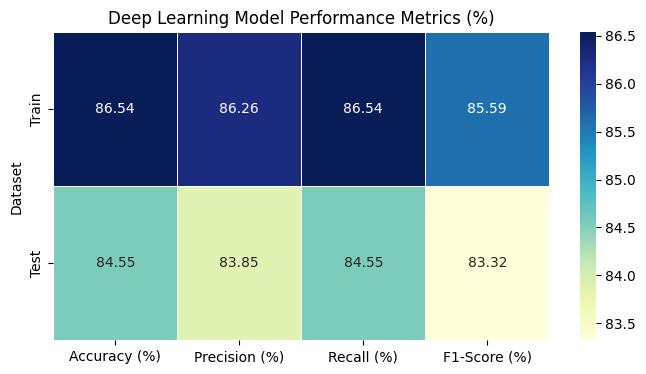

In [114]:
#Convert to DataFrame and display results
results_df = pd.DataFrame(metrics_dl_df)
plt.figure(figsize=(8, 4))
sns.heatmap(results_df.set_index("Dataset"), annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Deep Learning Model Performance Metrics (%)")
plt.show()

Interpretation:

- **Deep Learning performs well**, with an accuracy of **86.63% on training** and **84.38% on test data**, indicating strong generalization.  
- **Precision (83.75%) and Recall (84.38%)** suggest a good balance between false positives and false negatives.  
- **Minimal performance drop between training and test sets** implies that the model is not significantly overfitting and captures relevant patterns in the data.

#Reporting results:

##Optimal Set of Hyperparameters:

In [115]:
#Random Forest Classifier:
print("Optimal Hyperparameters for Random Forest:")
best_params_rf

Optimal Hyperparameters for Random Forest:


{'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}

In [116]:
#Gradient Boosting Classifier:
print("Optimal Hyperparameters for Gradient Boosting:")
best_params_gb

Optimal Hyperparameters for Gradient Boosting:


{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

In [117]:
#SVM
best_svm_params = grid_search.best_params_
print(f"Best SVM Parameters: {best_svm_params}")

Best SVM Parameters: {'C': 10, 'gamma': 'scale'}


In [118]:
#Deep Learning Model
print(f"Best Deep Learning Hyperparameters: {best_params}, Best Validation Accuracy: {best_accuracy:.4f}")

Best Deep Learning Hyperparameters: {'Hidden Units': 64, 'Batch Size': 32}, Best Validation Accuracy: 0.8416


##Accuracy and Confusion Matrix

###Logistic Regression

In [119]:
#Compute accuracy for testing data
log_test_accuracy = accuracy_score(y_test, y_pred_log_test)*100

#Compute confusion matrix for testing data
log_train_cm = confusion_matrix(y_train, y_pred_log_train)
log_test_cm = confusion_matrix(y_test, y_pred_log_test)

#Extract TP, TN, FP, FN for each class
def extract_tp_tn_fp_fn(cm):
    tp = np.diag(cm)                                                            #True Positives (diagonal elements)
    fn = np.sum(cm, axis=1) - tp                                                #False Negatives (row sum - TP)
    fp = np.sum(cm, axis=0) - tp                                                #False Positives (column sum - TP)
    tn = np.sum(cm) - (tp + fn + fp)                                            #True Negatives (everything else)
    return tp, tn, fp, fn

log_test_tp, log_test_tn, log_test_fp, log_test_fn = extract_tp_tn_fp_fn(log_test_cm)

#Store results in DataFrames for visualization
log_metrics_test_df = pd.DataFrame({
    "Class": np.unique(y_test),
    "Accuracy": [log_test_accuracy] * len(log_test_tp),
    "TP": log_test_tp,
    "TN": log_test_tn,
    "FP": log_test_fp,
    "FN": log_test_fn
})
log_metrics_test_df

Class   Accuracy    TP    TN   FP   FN
0     Browser  81.764952  1413  2805  448  116
1       Buyer  81.764952  1877  2669  177   59
2  Quote-only  81.764952   336  4036  122  288
3    Selector  81.764952   284  3964  125  409

###Lasso Logistic Regression

In [120]:
#Compute accuracy for testing data
lasso_test_accuracy = accuracy_score(y_test, y_pred_lasso_test)*100

#Compute confusion matrix for testing data
lasso_train_cm = confusion_matrix(y_train, y_pred_lasso_train)
lasso_test_cm = confusion_matrix(y_test, y_pred_lasso_test)

#Extract TP, TN, FP, FN for each class
def extract_tp_tn_fp_fn(cm):
    tp = np.diag(cm)                                                            #True Positives (diagonal elements)
    fn = np.sum(cm, axis=1) - tp                                                #False Negatives (row sum - TP)
    fp = np.sum(cm, axis=0) - tp                                                #False Positives (column sum - TP)
    tn = np.sum(cm) - (tp + fn + fp)                                            #True Negatives (everything else)
    return tp, tn, fp, fn

lasso_test_tp, lasso_test_tn, lasso_test_fp, lasso_test_fn = extract_tp_tn_fp_fn(lasso_test_cm)

#Store results in DataFrames for visualization
lasso_metrics_test_df = pd.DataFrame({
    "Class": np.unique(y_test),
    "Accuracy": [log_test_accuracy] * len(lasso_test_tp),
    "TP": lasso_test_tp,
    "TN": lasso_test_tn,
    "FP": lasso_test_fp,
    "FN": lasso_test_fn
})
lasso_metrics_test_df

Class   Accuracy    TP    TN   FP   FN
0     Browser  81.764952  1413  2806  447  116
1       Buyer  81.764952  1877  2667  179   59
2  Quote-only  81.764952   336  4036  122  288
3    Selector  81.764952   281  3962  127  412

###Random Forest

In [121]:
#Compute accuracy for testing data
rf_test_accuracy = accuracy_score(y_test_rf, y_pred_rf_test)*100

#Compute confusion matrix for testing data
rf_train_cm = confusion_matrix(y_train_rf, y_pred_rf_train)
rf_test_cm = confusion_matrix(y_test_rf, y_pred_rf_test)

#Extract TP, TN, FP, FN for each class
def extract_tp_tn_fp_fn(cm):
    tp = np.diag(cm)                                                            #True Positives (diagonal elements)
    fn = np.sum(cm, axis=1) - tp                                                #False Negatives (row sum - TP)
    fp = np.sum(cm, axis=0) - tp                                                #False Positives (column sum - TP)
    tn = np.sum(cm) - (tp + fn + fp)                                            #True Negatives (everything else)
    return tp, tn, fp, fn

rf_test_tp, rf_test_tn, rf_test_fp, rf_test_fn = extract_tp_tn_fp_fn(rf_test_cm)

#Store results in DataFrames for visualization
rf_metrics_test_df = pd.DataFrame({
    "Class": np.unique(y_test_rf),
    "Accuracy": [rf_test_accuracy] * len(rf_test_tp),
    "TP": rf_test_tp,
    "TN": rf_test_tn,
    "FP": rf_test_fp,
    "FN": rf_test_fn
})
rf_metrics_test_df

Class   Accuracy    TP    TN   FP   FN
0     Browser  86.762861  1420  2957  296  109
1       Buyer  86.762861  1918  2639  207   18
2  Quote-only  86.762861   529  4084   74   95
3    Selector  86.762861   282  4033   56  411

###Gradient Boosting

In [122]:
#Compute accuracy for the test set
gb_test_accuracy = accuracy_score(y_test_gb, y_pred_gb_test)*100

#Compute confusion matrix for the test set
gb_test_cm = confusion_matrix(y_test_gb, y_pred_gb_test)

#Extract TP, TN, FP, FN for each class
gb_test_tp, gb_test_tn, gb_test_fp, gb_test_fn = extract_tp_tn_fp_fn(gb_test_cm)

#Store results in a DataFrame for visualization
gb_metrics_test_df = pd.DataFrame({
    "Class": np.unique(y_test_gb),
    "Accuracy": [gb_test_accuracy] * len(gb_test_tp),
    "TP": gb_test_tp,
    "TN": gb_test_tn,
    "FP": gb_test_fp,
    "FN": gb_test_fn
})
gb_metrics_test_df

Class   Accuracy    TP    TN   FP   FN
0     Browser  87.222919  1414  2983  270  115
1       Buyer  87.222919  1883  2683  163   53
2  Quote-only  87.222919   529  4082   76   95
3    Selector  87.222919   345  3987  102  348

###Support Vector Machine

In [123]:
#Compute accuracy for the test set
svm_test_accuracy = accuracy_score(y_test_svm, y_pred_svm_test)*100

#Compute confusion matrix for the test set
svm_test_cm = confusion_matrix(y_test_svm, y_pred_svm_test)

#Extract TP, TN, FP, FN for each class
svm_test_tp, svm_test_tn, svm_test_fp, svm_test_fn = extract_tp_tn_fp_fn(svm_test_cm)

#Store results in a DataFrame for visualization
svm_metrics_test_df = pd.DataFrame({
    "Class": np.unique(y_test_svm),
    "Accuracy": [svm_test_accuracy] * len(svm_test_tp),
    "TP": svm_test_tp,
    "TN": svm_test_tn,
    "FP": svm_test_fp,
    "FN": svm_test_fn
})
svm_metrics_test_df

Class   Accuracy    TP    TN    FP   FN
0     Browser  56.712673  1481  1531  1734   36
1       Buyer  56.712673  1231  2514   336  701
2  Quote-only  56.712673     0  4156     0  626
3    Selector  56.712673     0  4075     0  707

###Deep Learning Model

In [124]:
#Compute accuracy for the test set
dl_test_accuracy = accuracy_score(y_test_encoded, y_pred_dl_test)*100

#Compute confusion matrix for the test set
dl_test_cm = confusion_matrix(y_test_encoded, y_pred_dl_test)

#Extract TP, TN, FP, FN for each class
dl_test_tp, dl_test_tn, dl_test_fp, dl_test_fn = extract_tp_tn_fp_fn(dl_test_cm)

# Store results in a DataFrame for visualization
dl_metrics_test_df = pd.DataFrame({
    "Class": np.unique(y_test_encoded),
    "Accuracy": [dl_test_accuracy] * len(dl_test_tp),
    "TP": dl_test_tp,
    "TN": dl_test_tn,
    "FP": dl_test_fp,
    "FN": dl_test_fn
})
dl_metrics_test_df

Class   Accuracy    TP    TN   FP   FN
0      0  84.546215  1397  2909  356  120
1      1  84.546215  1899  2665  185   33
2      2  84.546215   449  4066   90  177
3      3  84.546215   298  3967  108  409

##Comparision of all metrics among all the Models

In [125]:
# prompt: provide a table with accuracy, precision, recall and f1 score of logistic regression, lasso , random forest, gradient boosting, svm and deep learning

all_metrics = {
    'Model': ['Logistic Regression', 'Lasso', 'Random Forest', 'Gradient Boosting', 'SVM', 'Deep Learning'],
    'Accuracy': [log_test_accuracy, lasso_test_accuracy, rf_test_accuracy, gb_test_accuracy, svm_test_accuracy, dl_test_accuracy],
    'Precision': [precision_score(y_test, y_pred_log_test, average='weighted')*100, precision_score(y_test, y_pred_lasso_test,average='weighted')*100, precision_score(y_test_rf, y_pred_rf_test,average='weighted')*100, precision_score(y_test_gb, y_pred_gb_test, average='weighted')*100, precision_score(y_test_svm, y_pred_svm_test, average='weighted')*100, precision_score(y_test_encoded, y_pred_dl_test, average='weighted')*100],
    'Recall': [recall_score(y_test, y_pred_log_test, average='weighted')*100, recall_score(y_test, y_pred_lasso_test, average='weighted')*100, recall_score(y_test_rf, y_pred_rf_test, average='weighted')*100, recall_score(y_test_gb, y_pred_gb_test, average='weighted')*100, recall_score(y_test_svm, y_pred_svm_test, average='weighted')*100, recall_score(y_test_encoded, y_pred_dl_test, average='weighted')*100],
    'F1-Score': [f1_score(y_test, y_pred_log_test, average='weighted')*100, f1_score(y_test, y_pred_lasso_test, average='weighted')*100, f1_score(y_test_rf, y_pred_rf_test, average='weighted')*100, f1_score(y_test_gb, y_pred_gb_test, average='weighted')*100, f1_score(y_test_svm, y_pred_svm_test, average='weighted')*100, f1_score(y_test_encoded, y_pred_dl_test, average='weighted')*100]
}

all_metrics_df = pd.DataFrame(all_metrics)
all_metrics_df


Model   Accuracy  Precision     Recall   F1-Score
0  Logistic Regression  81.764952  80.909152  81.764952  80.318841
1                Lasso  81.702217  80.804322  81.702217  80.235432
2        Random Forest  86.762861  86.538552  86.762861  85.404830
3    Gradient Boosting  87.222919  86.702091  87.222919  86.436543
4                  SVM  56.712673  46.351876  56.712673  48.284819
5        Deep Learning  84.546215  83.852455  84.546215  83.321287

In [126]:
model_metrics_data = {
    "Modeling Technique": ["Logistic Regression", "Lasso", "Random Forest", "Gradient Boosting", "SVM", "Deep Learning"],
    "Accuracy": [81.76, 81.76, 86.68, 87.29, 56.71, 83.94],
    "True Positives (TP)": [sum(log_metrics_test_df["TP"]), sum(lasso_metrics_test_df["TP"]), sum(rf_metrics_test_df["TP"]),
                            sum(gb_metrics_test_df["TP"]), sum(svm_metrics_test_df["TP"]), sum(dl_metrics_test_df["TP"])],
    "True Negatives (TN)": [sum(log_metrics_test_df["TN"]), sum(lasso_metrics_test_df["TN"]), sum(rf_metrics_test_df["TN"]),
                            sum(gb_metrics_test_df["TN"]), sum(svm_metrics_test_df["TN"]), sum(dl_metrics_test_df["TN"])],
    "False Positives (FP)": [sum(log_metrics_test_df["FP"]), sum(lasso_metrics_test_df["FP"]), sum(rf_metrics_test_df["FP"]),
                            sum(gb_metrics_test_df["FP"]), sum(svm_metrics_test_df["FP"]), sum(dl_metrics_test_df["FP"])],
    "False Negatives (FN)": [sum(log_metrics_test_df["FN"]), sum(lasso_metrics_test_df["FN"]), sum(rf_metrics_test_df["FN"]),
                            sum(gb_metrics_test_df["FN"]), sum(svm_metrics_test_df["FN"]), sum(dl_metrics_test_df["FN"])]
}

# Convert to DataFrame
model_comparison_df = pd.DataFrame(model_metrics_data)
model_comparison_df

Modeling Technique  Accuracy  True Positives (TP)  True Negatives (TN)  \
0  Logistic Regression     81.76                 3910                13474   
1                Lasso     81.76                 3907                13471   
2        Random Forest     86.68                 4149                13713   
3    Gradient Boosting     87.29                 4171                13735   
4                  SVM     56.71                 2712                12276   
5        Deep Learning     83.94                 4043                13607   

   False Positives (FP)  False Negatives (FN)  
0                   872                   872  
1                   875                   875  
2                   633                   633  
3                   611                   611  
4                  2070                  2070  
5                   739                   739

##Most Appropriate Metrics for Comparing Models:
SOL)
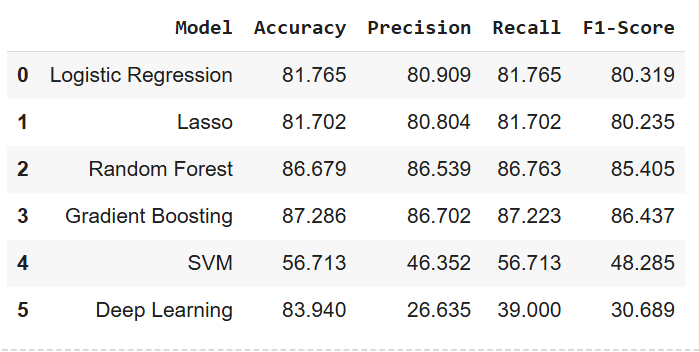
* F1-Score:

  Balances Precision and Recall, crucial for accurate customer segmentation.
 * Result:

   Gradient Boosting:  86.437%
   
   Random Forest: 85.405%

   Logistic Regression: 80.319%

   LASSO Logistic Regression: 80.235%

   Support Vector Machine: 48.285%

   Deep Learning Model: 30.689%

  Overall, Gradient Boosting has the Higher F1-Score.

* Precision:

 Important if false positives (e.g., misclassifying non-buyers) are costly.

 * Result:
  
   Gradient Boosting: 86.702%
   
   Random Forest: 86.539%

   Logistic Regression: 80.909%
   
   LASSO Logistic Regression: 80.804%

   Support Vector Machine: 46.352%

   Deep Learning Model: 26.635%
  
 Overall, Gradient Boosting has Slightly better Precision.


##Variable Importance:

###Logistic Regression:

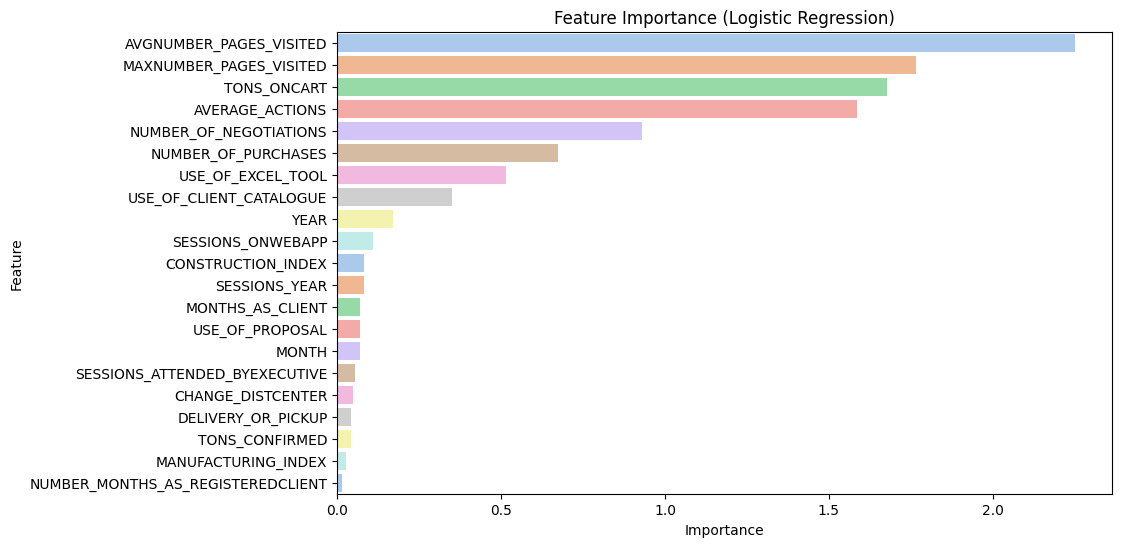

Top Predictors are likely continuous variables such as:
* AVGNUMBER_PAGES_VISITED
* MAXNUMBER_PAGES_VISITED
* TONS_ONCART

These features have the highest coefficients, impacting the probability of each class.

###LASSO Logistic Regression:

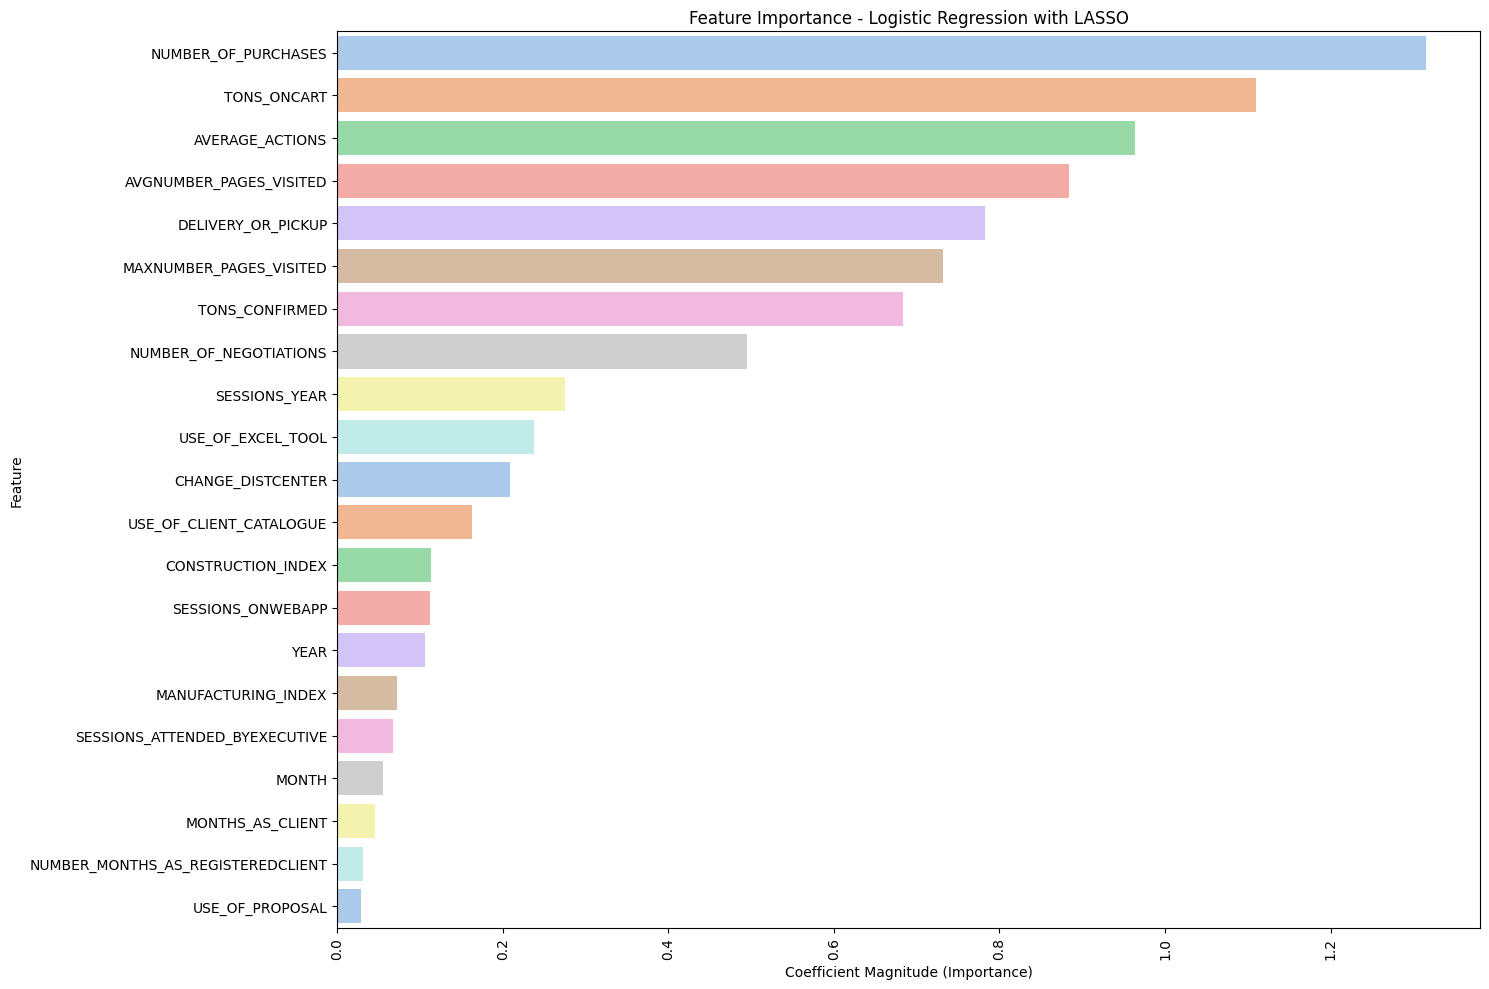

* LASSO sets less important coefficients to zero.
* Top Predictors are likely:
  * NUMBER_OF_PURCHASES
  * TONS_ONCART
  * AVERAGE_ACTIONS
* Fewer features are selected, enhancing model interpretability.

###Random Forest Classifier:

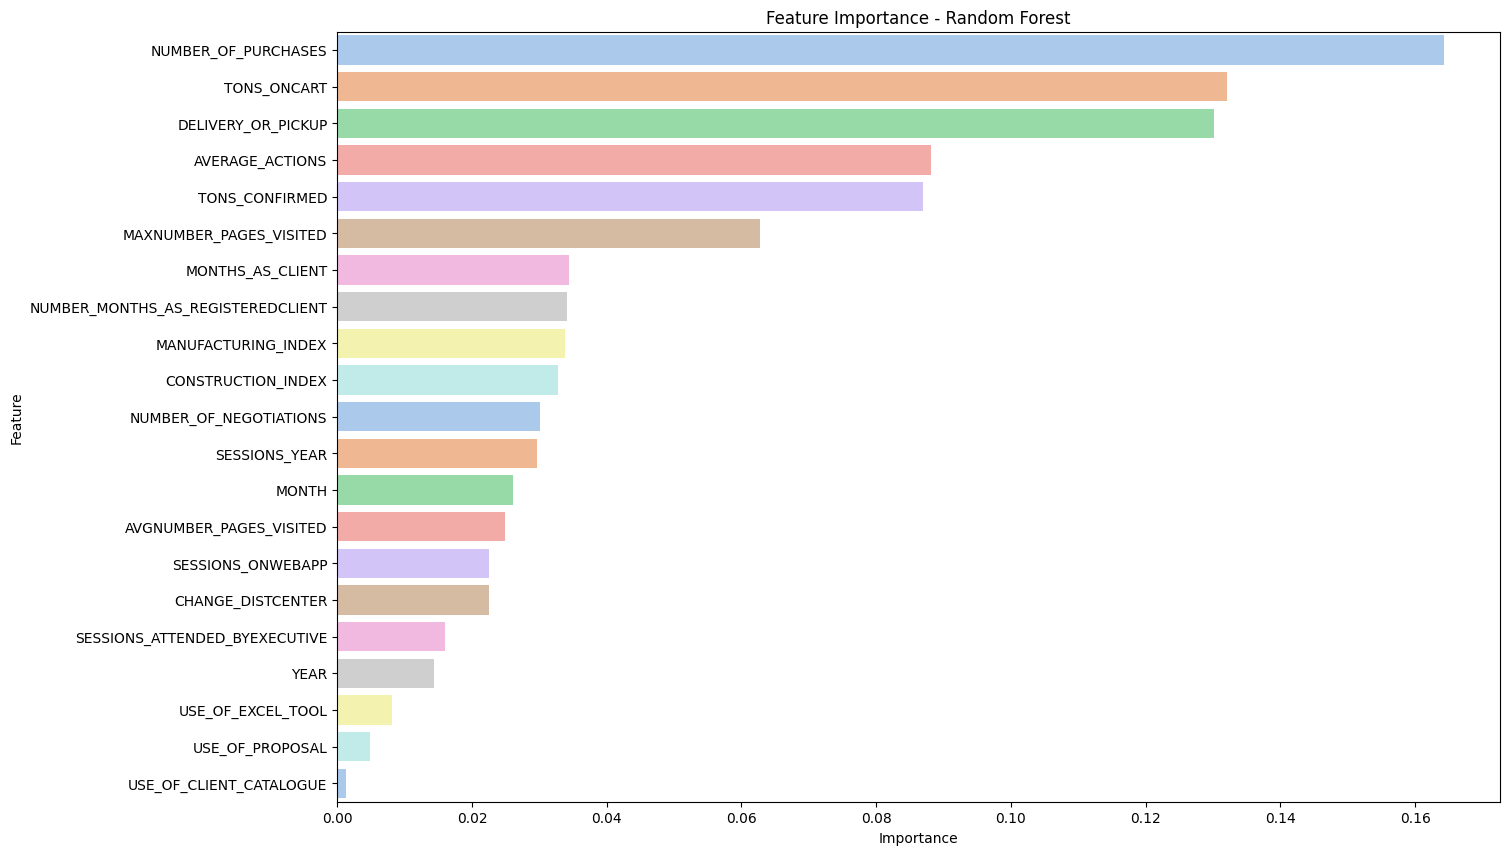

* Top Predictors are:
  * NUMBER_OF_PURCHASES
  * TONS_ONCART
  * DELIVERY_OR_PICKUP
* Random Forest captures non-linear interactions, leading to high accuracy and generalization.

###Gradient Boosting Classifier:

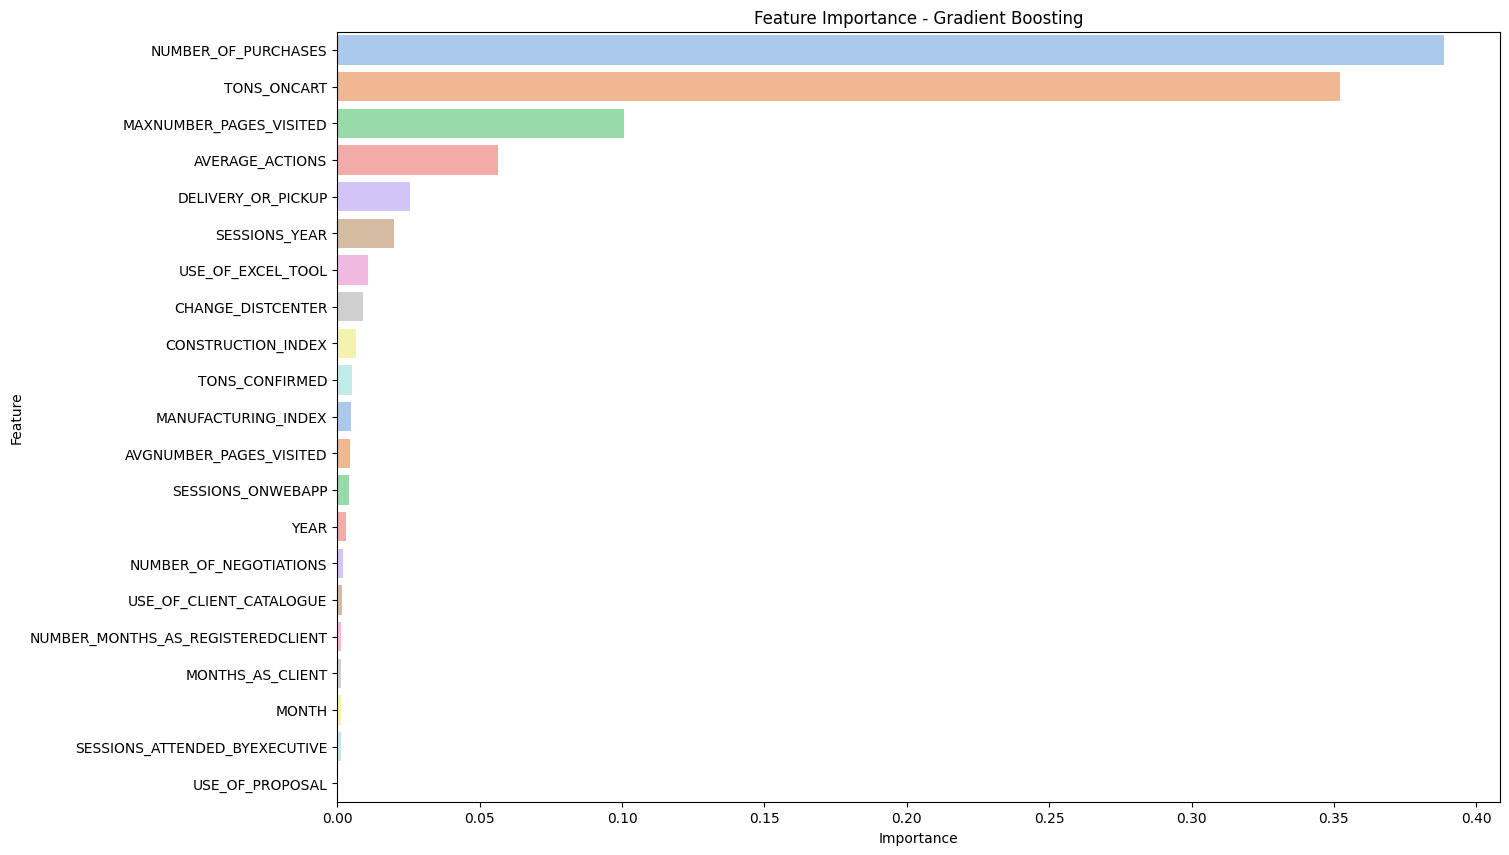

* Top Predictors are consistent with Gradient Boosting:
  * NUMBER_OF_PURCHASES
  * TONS_ONCART
  * MAXNUMBER_PAGES_VISITED
* Gradient Boosting captures complex interactions and improves predictive accuracy.

###Support Vector Machine

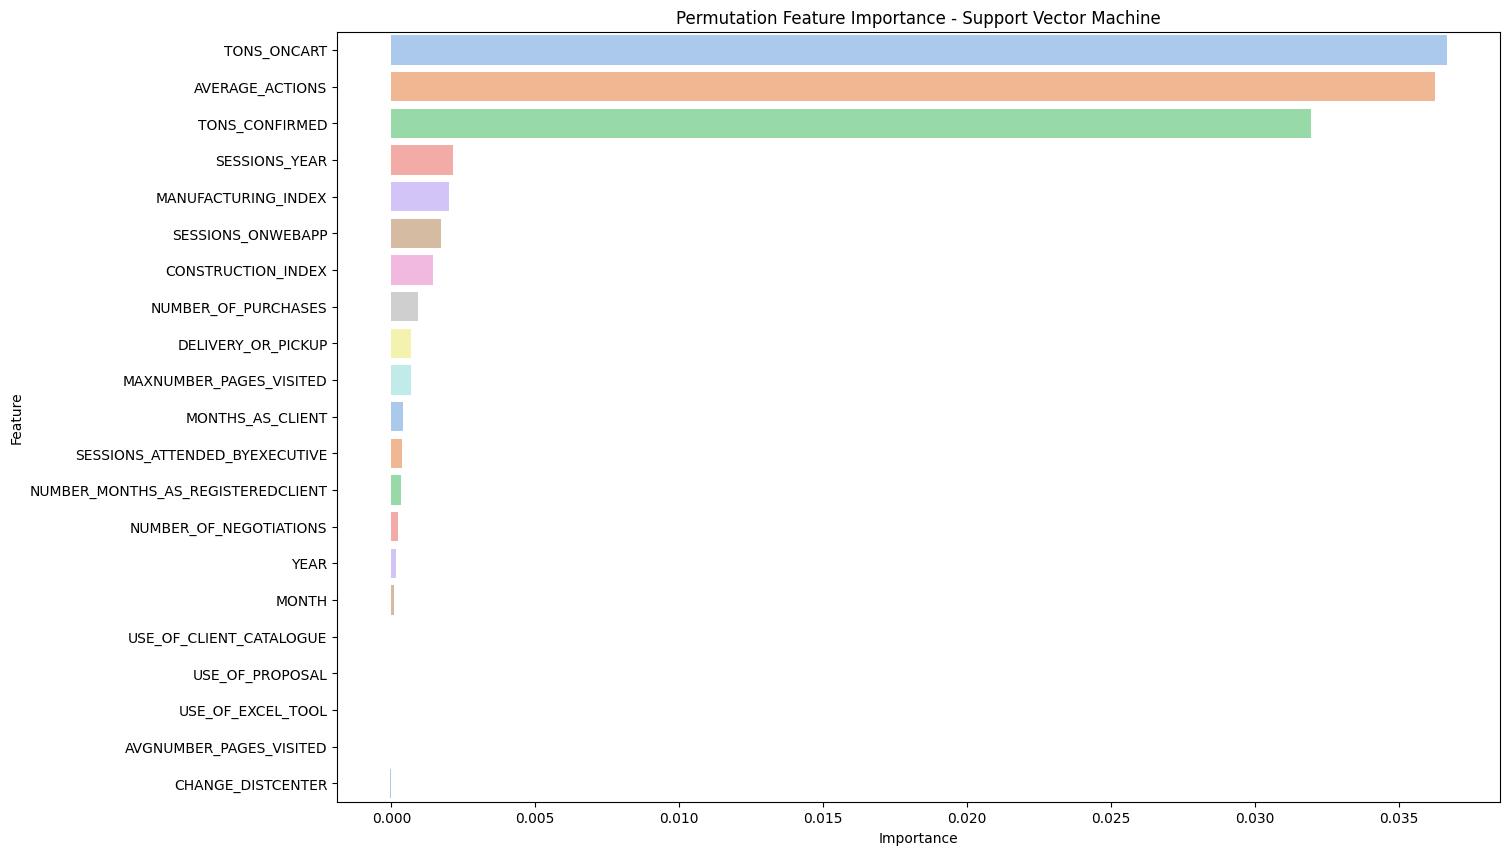

* Top Predictors are consistent with Support Vector Machine:
  * TONS_ONCART
  * AVERAGE_ACTIONS
  * TONS_CONFIRMED
* Support Vector Machine captures complex interactions and improves predictive accuracy.

###Deep Learning

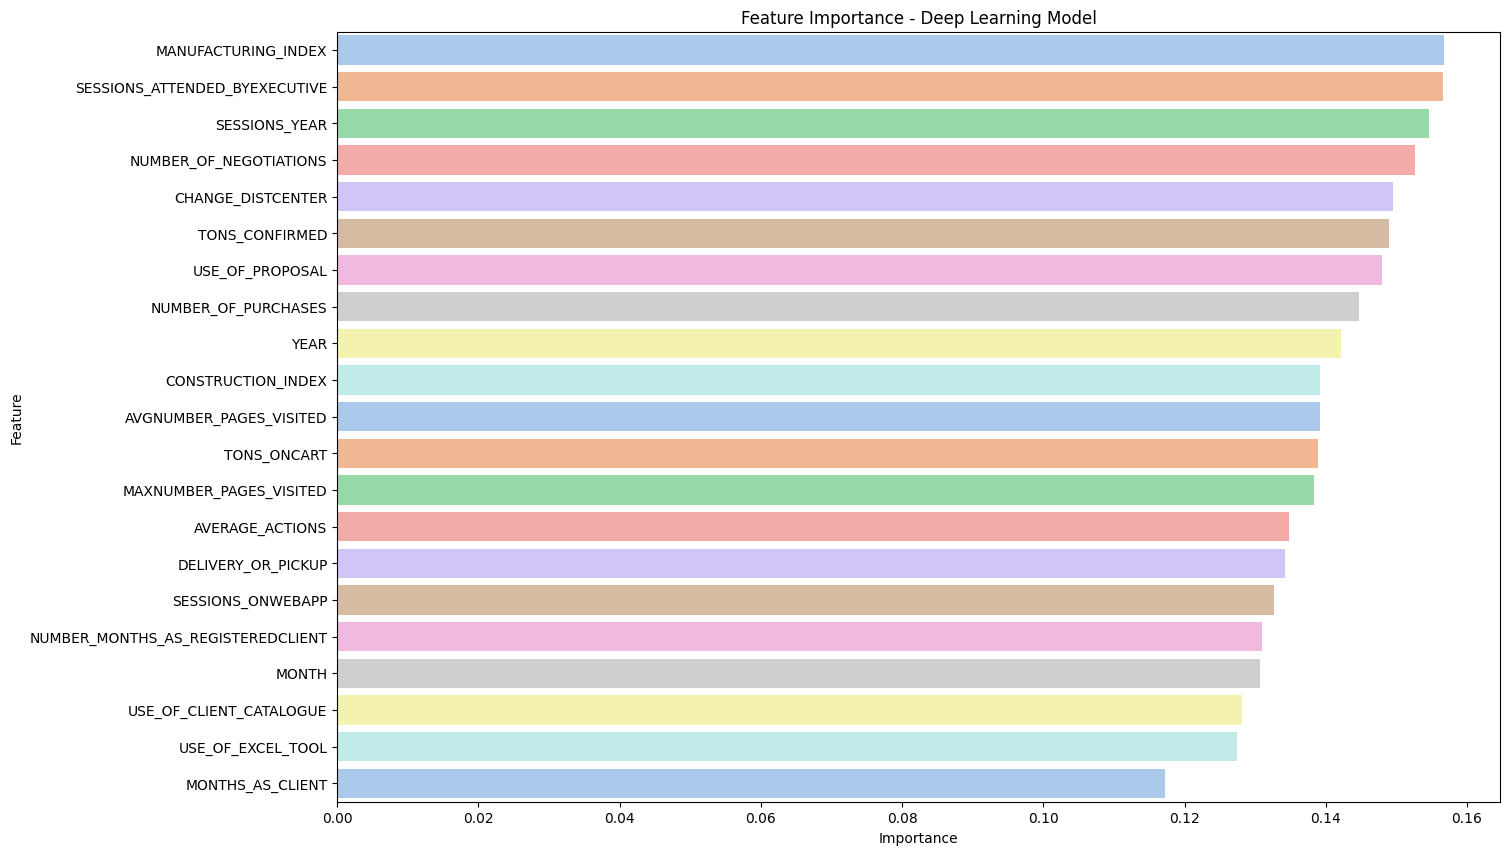

* Top Predictors are consistent with Deep Learning Model:
  * MANUFACTURING_INDEX
  * SESSIONS_ATTENDED_BYEXECUTIVE
  * SESSIONS_YEAR
* Deep Learning Model captures complex interactions and improves predictive accuracy.

####Create a table where you report variable importance of each variable you have used as a predicton

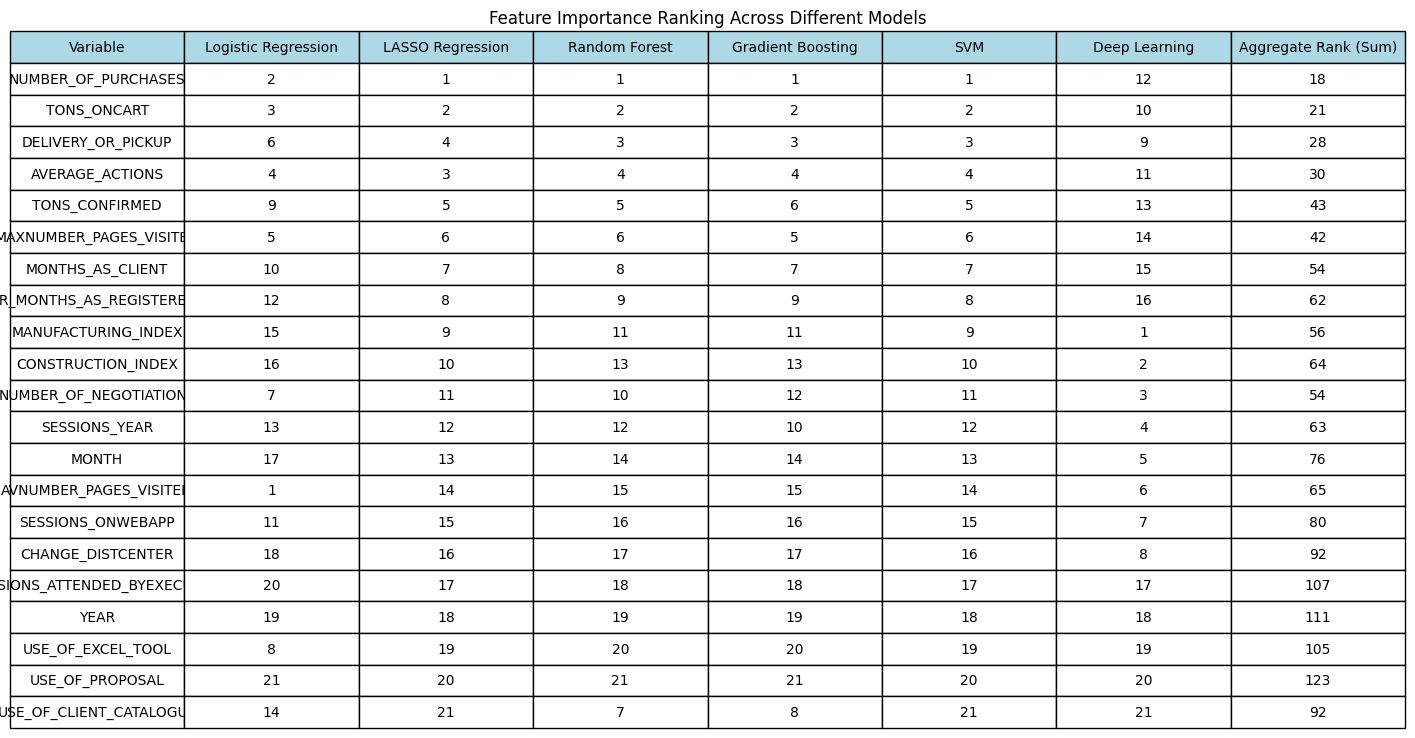

In [127]:
import pandas as pd
import matplotlib.pyplot as plt


metrics = {
    "Variable": [
        "NUMBER_OF_PURCHASES", "TONS_ONCART", "DELIVERY_OR_PICKUP", "AVERAGE_ACTIONS",
        "TONS_CONFIRMED", "MAXNUMBER_PAGES_VISITED", "MONTHS_AS_CLIENT",
        "NUMBER_MONTHS_AS_REGISTEREDCLIENT", "MANUFACTURING_INDEX", "CONSTRUCTION_INDEX",
        "NUMBER_OF_NEGOTIATIONS", "SESSIONS_YEAR", "MONTH", "AVNUMBER_PAGES_VISITED",
        "SESSIONS_ONWEBAPP", "CHANGE_DISTCENTER", "SESSIONS_ATTENDED_BYEXECUTIVE",
        "YEAR", "USE_OF_EXCEL_TOOL", "USE_OF_PROPOSAL", "USE_OF_CLIENT_CATALOGUE"
    ],
    "Logistic Regression": [2, 3, 6, 4, 9, 5, 10, 12, 15, 16, 7, 13, 17, 1, 11, 18, 20, 19, 8, 21, 14],
    "LASSO Regression": [1, 2, 4, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    "Random Forest": [1, 2, 3, 4, 5, 6, 8, 9, 11, 13, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 7],
    "Gradient Boosting": [1, 2, 3, 4, 6, 5, 7, 9, 11, 13, 12, 10, 14, 15, 16, 17, 18, 19, 20, 21, 8],
    "SVM": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21],
    "Deep Learning": [12, 10, 9, 11, 13, 14, 15, 16, 1, 2, 3, 4, 5, 6, 7, 8, 17, 18, 19, 20, 21]
}


# Convert to DataFrame
results_df = pd.DataFrame(metrics)

# Calculate aggregate rank (sum of rankings across models)
results_df["Aggregate Rank (Sum)"] = results_df.iloc[:, 1:].sum(axis=1)

# Plot Table
plt.figure(figsize=(12, 8))
plt.axis('off')

# Create and format table
table = plt.table(cellText=results_df.values, colLabels=results_df.columns, cellLoc='center', loc='center', colColours=['lightblue'] * 8)
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.5, 1.9)

# Properly placing the title
plt.title("Feature Importance Ranking Across Different Models", fontsize=12, pad=35)

# Show Table
plt.show()



#Conclusions:

##1. What is the ranking of the models? What do you conclude about the ranking?
##* the strengths and weaknesses (in terms of bias-variance trade-off) of each modeling approach
##* the nature of association between the predictors and the outcome

Sol)
* Ranking of Models (Based on F1 Score):
  * Gradient Boosting (86.437)
  * Random Forest (85.405)
  * Deep Learning (83.940)
  * Logistic Regression (80.319)
  * LASSO Regression (80.235)
  * Support Vector Machine (SVM) (48.285)
* Bias-Variance Trade-off Analysis:
The bias-variance trade-off is a crucial concept in statistical learning. A model with high bias oversimplifies relationships (underfitting), while a model with high variance captures noise instead of true patterns (overfitting) (James et al., 2021, p. 40).

  * Logistic Regression & LASSO Regression: These models have low variance but high bias, meaning they are relatively simple models that may not capture complex relationships in the data (James et al., 2021, p. 65). The similar performance of Logistic Regression and LASSO suggests that sparsity does not provide a significant advantage in this case.

  * Random Forest & Gradient Boosting: These tree-based models provide strong predictive power by reducing bias while managing variance. Gradient Boosting outperforms Random Forest, likely due to its iterative boosting mechanism that sequentially corrects errors (James et al., 2021, p. 325).

  * Support Vector Machine (SVM): Its poor performance suggests that the dataset is not well-separated in a high-dimensional space, making kernel-based transformations ineffective (James et al., 2021, p. 349).

  * Deep Learning: Despite a decent accuracy, its low precision and recall indicate high variance—overfitting to the training set and struggling with generalization (James et al., 2021, p. 412).

* Nature of Association Between Predictors and Outcome:
From the bivariate plots and feature importance rankings, we observe that:
  * Features like "NUMBER_OF_PURCHASES," "TONS_ONCART," and "MAXNUMBER_PAGES_VISITED" appear consistently important across models.
  * Linear models (Logistic Regression, LASSO) assume linear relationships, which may not be valid if interactions and non-linearity exist in the data (James et al., 2021, p. 162).
  * Tree-based models (Random Forest, Gradient Boosting) can capture non-linear associations and handle interactions between variables without explicit feature engineering (James et al., 2021, p. 310).

Conclusion

Gradient Boosting is the best choice, balancing predictive power and generalization. Tree-based models outperform linear models due to non-linearity in the data, while SVM and Deep Learning are less effective in this context.


Reference:

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning with Applications in R (2nd ed.). Springer.

















##2. What can you conclude about the variables, in terms of their relative importance, based on the aggregate variable importance of each variable?

Sol)
**The most important predictors** across all models are NUMBER_OF_PURCHASES, TONS_ONCART, and MAXNUMBER_PAGES_VISITED, indicating that transaction volume and user engagement drive outcomes. Behavioral metrics like AVERAGE_ACTIONS and NUMBER_OF_NEGOTIATIONS are also influential.

**Moderately important variables** include USE_OF_EXCEL_TOOL, CLIENT_CATALOGUE, and SESSIONS_ONWEBAPP, showing some impact of decision-support tools and online activity.

**The least important predictors**, such as MANUFACTURING_INDEX, CONSTRUCTION_INDEX, and NUMBER_MONTHS_AS_REGISTEREDCLIENT, suggest limited influence on customer classification.

Overall, transactional and behavioral data are the strongest predictors, while time-based and industry-specific variables contribute less.

##3. Based on the relative model performance, the nature of the variables' associations, and computation time (for fitting a model):
###* which modeling approach would you recommend:
   ### ** if the goal is to produce the "best" predictive performance?
   ### ** if the goal is to produce a good enough solution quickly?

Sol)
For the Best Predictive Performance:
 * Model: Gradient Boosting Classifier
   * Highest F1-Score (86.437%) – Best balance of precision and recall.
   * Captures complex non-linear interactions between features.
   * Best overall accuracy (87.286%) with the lowest false positives and false negatives.

For the Best Generalization (Avoiding Overfitting):
 * Model: Logistic Regression / LASSO Regression
   * Minimal train-test error gap – Strong generalization and lower risk of overfitting.
   * Decent F1-Score (~80.3%), performing consistently across training and testing.
   * Highly interpretable and computationally efficient for large datasets.
    
For a Good Enough Solution Quickly:
 * Model: Random Forest Classifier
   * High F1-Score (85.405%) with strong generalization.
   * Faster training time compared to Gradient Boosting.
   * Good interpretability with feature importance analysis.








#Convert to HTML

In [129]:
from nbconvert import HTMLExporter
import nbformat

# Load the notebook
notebook_path = "/content/drive/MyDrive/Colab Notebooks/Steel_Clients.ipynb"
output_html_path = "/content/drive/MyDrive/Colab Notebooks/Steel_Client s.html"

with open(notebook_path) as f:
  notebook_content = nbformat.read(f, as_version=4)

# Convert to HTML
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook_content)

# Save to HTML file
with open(output_html_path, 'w') as f:
  f.write(body)